Challenge Alura
Telecom X - Análise de Evasão de Clientes

Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


#📌 **Extração**


In [289]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [290]:
dados = pd.read_json(url)
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [291]:
customer = pd.json_normalize(dados['customer'])
phone = pd.json_normalize(dados['phone'])
internet = pd.json_normalize(dados['internet'])
account = pd.json_normalize(dados['account'])

cols_dic = ['customerID','Churn']
dados_base = dados[cols_dic].reset_index(drop=True)

dados_normalizados = pd.concat([dados_base,customer,phone,internet,account],axis=1)
dados_normalizados.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 **Transformação**

In [292]:
dados_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [293]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [294]:
dados_normalizados.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [295]:
(dados_normalizados=='').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [296]:
#verificar o tipo de dado na coluna
dados_normalizados['Charges.Total'].dtype

dtype('O')

In [297]:
#verificar se tem valores nulos
dados_normalizados['Charges.Total'].isna().sum()

np.int64(0)

In [298]:
#transformando a coluna em float
dados_normalizados['Charges.Total'] = pd.to_numeric(dados_normalizados['Charges.Total'], errors='coerce')



In [299]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [300]:
col_categoricas = dados_normalizados.select_dtypes(include = 'object').columns
col_categoricas

Index(['customerID', 'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [301]:
print(dados_normalizados.nunique())

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6530
dtype: int64


In [302]:
print(dados_normalizados['Churn'].unique())
print(dados_normalizados['gender'].unique())
print(dados_normalizados['SeniorCitizen'].unique())
print(dados_normalizados['Partner'].unique())
print(dados_normalizados['Dependents'].unique())
print(dados_normalizados['PhoneService'].unique())
print(dados_normalizados['MultipleLines'].unique())
print(dados_normalizados['InternetService'].unique())
print(dados_normalizados['OnlineSecurity'].unique())
print(dados_normalizados['OnlineBackup'].unique())
print(dados_normalizados['DeviceProtection'].unique())
print(dados_normalizados['StreamingTV'].unique())
print(dados_normalizados['StreamingMovies'].unique())
print(dados_normalizados['Contract'].unique())
print(dados_normalizados['PaperlessBilling'].unique())
print(dados_normalizados['PaymentMethod'].unique())

['No' 'Yes' '']
['Female' 'Male']
[0 1]
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [303]:
dados_normalizados.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


In [304]:
vazio = dados_normalizados.query('Churn == ""').shape[0]
vazio

224

In [305]:
total_clientes = dados_normalizados.shape[0]
total_clientes

7267

In [306]:
porcentagem_vazio = f'{(vazio/total_clientes)*100 :.2f}%'
porcentagem_vazio

'3.08%'

In [307]:
dados_normalizados['Churn'] = dados_normalizados['Churn'].replace(['', ' ', None], np.nan).fillna('Não informado')

In [308]:
dados_normalizados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
Não informado,224


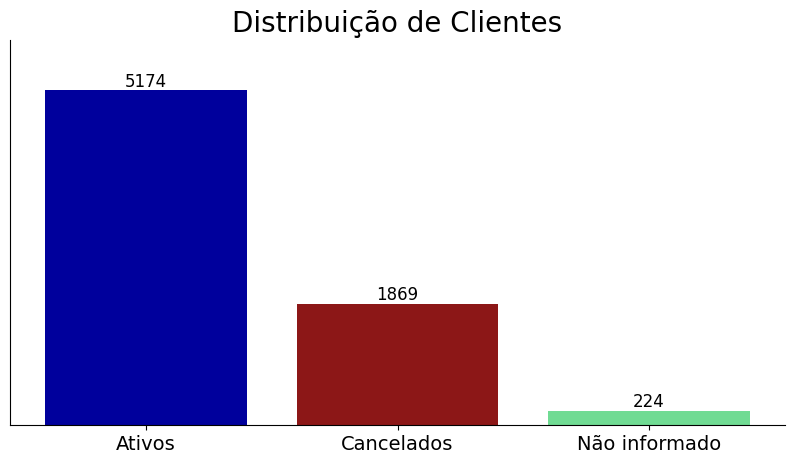

In [309]:
contagem = dados_normalizados['Churn'].value_counts()

cores = ['#00009C', '#8C1717', '#70DB93']

rotulos_x = ['Ativos', 'Cancelados', 'Não informado']

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(rotulos_x,contagem.values,color=cores)
ax.set_title('Distribuição de Clientes', fontsize=20)
ax.set_xlabel('Clientes', fontsize=14)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')

#Configura os rótulos do eixo X
ax.set_xticks(rotulos_x)
ax.tick_params(axis='x',labelsize=14,labelcolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(y=0.15)


#Rótulos nas barras
for i, v in enumerate(contagem.values):
    ax.text(i,v,str(v),ha='center',va='bottom',color='black',fontsize=12)

os.makedirs("imagens", exist_ok=True)

plt.savefig("imagens/distribuicao_clientes.png", dpi=300, bbox_inches="tight")
plt.show()

#📊 **Carga e análise**

In [310]:
#considerando o total de clientes sem os clientes com churn não informado

total_clientes = dados_normalizados[dados_normalizados['Churn'].isin(['Yes', 'No'])].shape[0]
total_clientes

7043

In [311]:
#clientes_ativos = dados_normalizados[dados_normalizados['Churn']=='No']

In [312]:
clientes_cancelados = dados_normalizados[dados_normalizados['Churn'] == 'Yes'].shape[0]

In [313]:
percentual_cancelamento = (clientes_cancelados / total_clientes) * 100
percentual_cancelamento = f'{percentual_cancelamento:.2f}%'
percentual_cancelamento



'26.54%'

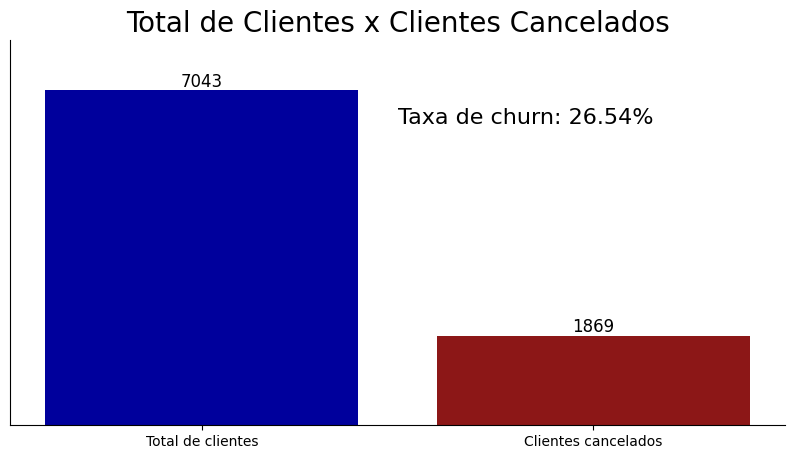

In [314]:
categorias = ['Total de clientes', 'Clientes cancelados']
valores = [total_clientes, clientes_cancelados]

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(categorias,valores,color=cores)
ax.set_title('Total de Clientes x Clientes Cancelados', fontsize=20)
ax.set_xlabel('Clientes', fontsize=14)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(y=0.15)

#Rótulos nas barras

for i, v in enumerate(valores):
    ax.text(i,v,str(v),ha='center',va='bottom',color='black',fontsize=12)

plt.text(0.5,max(valores)*0.9,f'Taxa de churn: {percentual_cancelamento}',ha='left',fontsize=16)
plt.savefig("imagens/clientes_X_cancelados.png", dpi=300, bbox_inches="tight")

plt.show()

In [315]:
clientes_cancelados = dados_normalizados[dados_normalizados['Churn'] == 'Yes']
clientes_cancelados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.50
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.10


In [316]:
clientes_cancelados.value_counts('Churn')

,count
Churn,
Yes,1869


In [271]:
clientes_ativos = dados_normalizados[dados_normalizados['Churn'] == 'No']

In [247]:
idade65 = clientes_cancelados['SeniorCitizen'].value_counts()
idade65


,count
SeniorCitizen,
0,1393
1,476


In [186]:
parceiros = clientes_cancelados['Partner'].value_counts()
parceiros

,count
Partner,
No,1200
Yes,669


In [187]:
dependentes = clientes_cancelados['Dependents'].value_counts()
dependentes

,count
Dependents,
No,1543
Yes,326



Criando uma faixa etaria para tempo de contrato

In [188]:
clientes_cancelados.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85


In [189]:
#criando uma coluna com faixa etaria de assinatura de clientes

bins = [0,5,12,24,48, float('inf')]
labels = ['ate 5 meses','até 12 meses','até 24 meses','até 48 meses','mais de 48 meses']

clientes_cancelados['FaixaEtaria'] = pd.cut(clientes_cancelados['tenure'], bins = bins, labels = labels, right=True, include_lowest=True)

/tmp/ipython-input-167217943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_cancelados['FaixaEtaria'] = pd.cut(clientes_cancelados['tenure'], bins = bins, labels = labels, right=True, include_lowest=True)


In [190]:
faixa_etaria = clientes_cancelados['FaixaEtaria'].value_counts()
faixa_etaria

,count
FaixaEtaria,
ate 5 meses,744
até 48 meses,325
até 24 meses,294
até 12 meses,293
mais de 48 meses,213


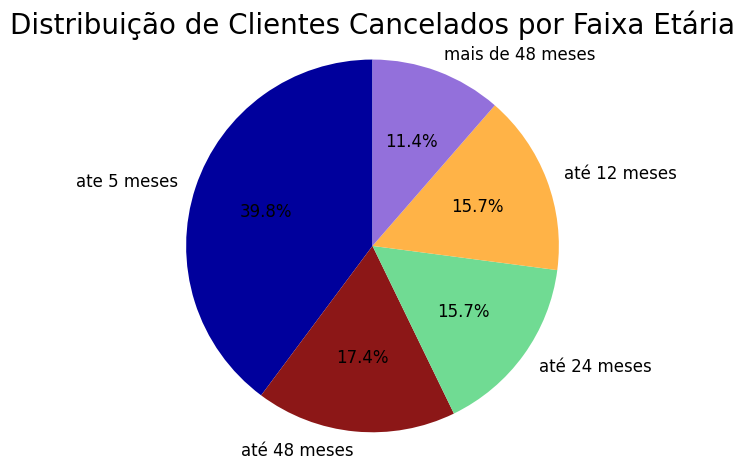

In [191]:
cores = ['#00009C', '#8C1717', '#70DB93', '#FFB347', '#9370DB']

plt.pie(faixa_etaria.values,labels=faixa_etaria.index,autopct='%1.1f%%',startangle=90,colors=cores,textprops={'fontsize': 12})

plt.title('Distribuição de Clientes Cancelados por Faixa Etária', fontsize=20)
plt.axis('equal')  # deixa o círculo perfeito
plt.tight_layout()
plt.savefig("imagens/faixa_etaria.png", dpi=300, bbox_inches="tight")

plt.show()



Serviços contratados

Cancelamentos relacionados aos serviços contratados

In [192]:
servicos = ['PhoneService','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','MultipleLines']


In [193]:
seguranca_on_line = clientes_cancelados['OnlineSecurity'].value_counts()
seguranca_on_line

,count
OnlineSecurity,
No,1461
Yes,295
No internet service,113


In [194]:
backup_on_line = clientes_cancelados['OnlineBackup'].value_counts()
backup_on_line

,count
OnlineBackup,
No,1233
Yes,523
No internet service,113


In [195]:
protecao_dispositivos = clientes_cancelados['DeviceProtection'].value_counts()
protecao_dispositivos

,count
DeviceProtection,
No,1211
Yes,545
No internet service,113


In [196]:
suporte_tecnico = clientes_cancelados['TechSupport'].value_counts()
suporte_tecnico


,count
TechSupport,
No,1446
Yes,310
No internet service,113


In [197]:
streaming_TV = clientes_cancelados['StreamingTV'].value_counts()
streaming_TV

,count
StreamingTV,
No,942
Yes,814
No internet service,113


In [198]:
streaming_filme = clientes_cancelados['StreamingMovies'].value_counts()
streaming_filme

,count
StreamingMovies,
No,938
Yes,818
No internet service,113


Analisando serviço de telefone x servico de internet

qual a relação entre os clientes que assinam serviço de telefone e serviço de internet

In [199]:
servico_telefone = clientes_cancelados['PhoneService'].value_counts()
servico_telefone

,count
PhoneService,
Yes,1699
No,170


In [200]:
servico_internet = clientes_cancelados['InternetService'].value_counts()
servico_internet

,count
InternetService,
Fiber optic,1297
DSL,459
No,113


In [201]:
multiplas_linhas = clientes_cancelados['MultipleLines'].value_counts()
multiplas_linhas

,count
MultipleLines,
Yes,850
No,849
No phone service,170


In [202]:
total_servicos = pd.concat([servico_telefone,servico_internet,seguranca_on_line, backup_on_line, protecao_dispositivos,suporte_tecnico, streaming_TV, streaming_filme,multiplas_linhas], axis=1)
total_servicos.reset_index(inplace=True)
nome_colunas = ['PhoneService','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','MultipleLines']
col1 = ['Possui']
total_servicos.columns = col1 + nome_colunas
total_servicos

,Possui,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,Yes,1699.0,NaN,295.0,523.0,545.0,310.0,814.0,818.0,850.0
1,No,170.0,113.0,1461.0,1233.0,1211.0,1446.0,942.0,938.0,849.0
2,Fiber optic,NaN,1297.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DSL,NaN,459.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No internet service,NaN,NaN,113.0,113.0,113.0,113.0,113.0,113.0,NaN
5,No phone service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0


In [203]:
#  Remover InternetService
df_plot = total_servicos.drop(columns=['InternetService'])

# Manter apenas Possui = Yes / No
df_plot = df_plot[df_plot['Possui'].isin(['Yes', 'No'])]

# Remover NaN (substituir por 0)
df_plot = df_plot.fillna(0)

# 4. Definir índice e transpor
df_plot = df_plot.set_index('Possui').T


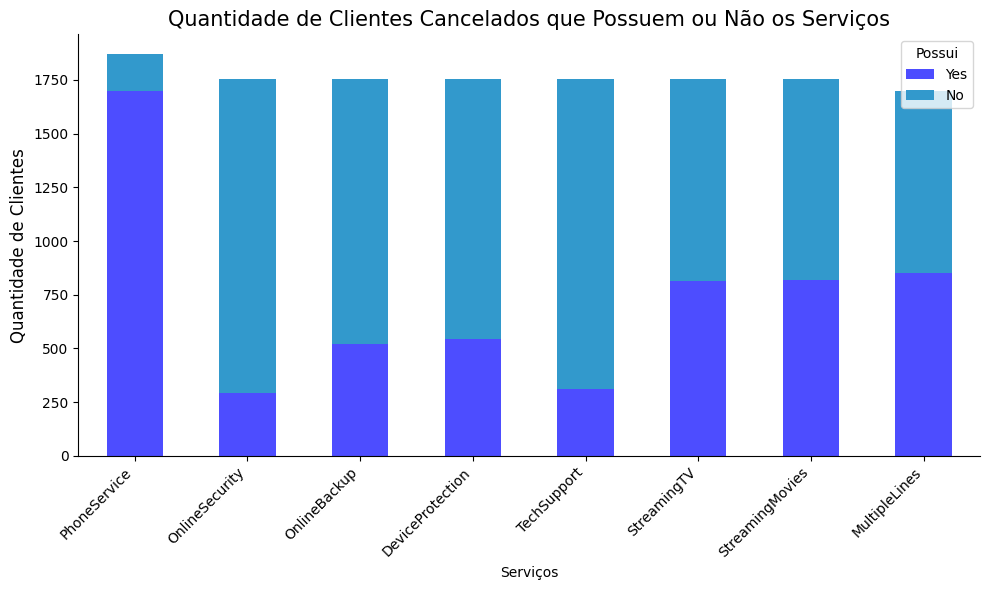

In [204]:
fig, ax = plt.subplots(figsize=(10, 6))

cores = ['#4D4DFF','#3299CC']
# 5. Plotar gráfico de barras empilhadas
df_plot.plot(kind='bar', stacked=True, ax=ax, color=cores)

plt.title('Quantidade de Clientes Cancelados que Possuem ou Não os Serviços',fontsize = 15)
plt.xlabel('Serviços')
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("imagens/possuem_serviços.png", dpi=300, bbox_inches="tight")
plt.show()

#cruzamento de informações

serviço telefone x outros serviços

Entre serviço de telefone X serviço de internet

- todos os clientes cancelados que tem fibra otica tem serviço de telefone embora não precise de telefone para ter fibra otica.

- Os clientes com fibra otica e serviço de telefone pagam em media mais caro do que os clientes que tem serviço de telefone e DSL

- dos 1699 clientes que tem serviço de telefone 1297 tem tbem fibra otica

In [205]:
pd.crosstab(clientes_cancelados['PhoneService'], clientes_cancelados['InternetService'])

InternetService,DSL,Fiber optic,No
PhoneService,,,
No,170,0,0
Yes,289,1297,113


Qdo tem serviço de telefone e fibra otica fica mais caro o plano

Serviço telefone x suporte tecnico

- 1304 clientes tem linha de telefone e não tem suporte tecnico

In [206]:
pd.crosstab(clientes_cancelados['PhoneService'], clientes_cancelados['TechSupport'])

TechSupport,No,No internet service,Yes
PhoneService,,,
No,142,0,28
Yes,1304,113,282


Serviço telefone x proteção de dispositivo

- 1090 clientes tem linha de telefone e não tem proteção do dispositivo

In [207]:
pd.crosstab(clientes_cancelados['PhoneService'], clientes_cancelados['DeviceProtection'])

DeviceProtection,No,No internet service,Yes
PhoneService,,,
No,121,0,49
Yes,1090,113,496


Serviço telefone x streaming filmes

- 840 clientes tem linha de telefone e não tem streaming e filmes mas 742 tem os dois, acredito que não esteja influenciando tanto nos cancelamentos

In [208]:
pd.crosstab(clientes_cancelados['PhoneService'],clientes_cancelados['StreamingMovies'])

StreamingMovies,No,No internet service,Yes
PhoneService,,,
No,98,0,72
Yes,840,113,746


Serviço telefone x streaming tv

- 836 clientes tem linha de telefone e não tem streaming e filmes mas 750 tem os dois, acredito que não esteja influenciando tanto nos cancelamentos

In [209]:
pd.crosstab(clientes_cancelados['PhoneService'],clientes_cancelados['StreamingTV'])

StreamingTV,No,No internet service,Yes
PhoneService,,,
No,106,0,64
Yes,836,113,750


Serviço telefone x streaming tv

- 849 clientes tem linha de telefone e não tem streaming e filmes mas 850 tem os dois, acredito que não esteja influenciando tanto nos cancelamentos

In [210]:
pd.crosstab(clientes_cancelados['PhoneService'],clientes_cancelados['MultipleLines'])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,170,0
Yes,849,0,850


In [211]:
pd.crosstab(clientes_cancelados['PhoneService'],clientes_cancelados['OnlineBackup'])

OnlineBackup,No,No internet service,Yes
PhoneService,,,
No,119,0,51
Yes,1114,113,472


In [212]:
pd.crosstab(clientes_cancelados['PhoneService'],clientes_cancelados['OnlineSecurity'])

OnlineSecurity,No,No internet service,Yes
PhoneService,,,
No,141,0,29
Yes,1320,113,266


#Cruzamento de informações fibra otica




In [213]:
pd.crosstab(clientes_cancelados['InternetService'], clientes_cancelados['OnlineSecurity'])


OnlineSecurity,No,No internet service,Yes
InternetService,,,
DSL,347,0,112
Fiber optic,1114,0,183
No,0,113,0


In [214]:
pd.crosstab(clientes_cancelados['InternetService'], clientes_cancelados['OnlineBackup'])

OnlineBackup,No,No internet service,Yes
InternetService,,,
DSL,343,0,116
Fiber optic,890,0,407
No,0,113,0


In [215]:
pd.crosstab(clientes_cancelados['InternetService'], clientes_cancelados['DeviceProtection'])

DeviceProtection,No,No internet service,Yes
InternetService,,,
DSL,342,0,117
Fiber optic,869,0,428
No,0,113,0


# Forma de pagamento

In [216]:
forma_pgto = clientes_cancelados['PaymentMethod'].value_counts()
forma_pgto

,count
PaymentMethod,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232


# Tipo de contrato


In [217]:
tipo_contrato = clientes_cancelados['Contract'].value_counts()
tipo_contrato

,count
Contract,
Month-to-month,1655
One year,166
Two year,48


 Tipo de ontrato x forma de pagamento

Conclusão: Clientes que pagam por mes e por cheque eletronico tem mais chance de cancelamento



In [218]:
pd.crosstab(clientes_cancelados['Contract'], clientes_cancelados['PaymentMethod'])

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,201,178,994,282
One year,38,41,64,23
Two year,19,13,13,3


In [ ]:
mes_a_mes = clientes_cancelados.groupby(['Contract','PaymentMethod'])['Charges.Monthly'].mean().reset_index()
mes_a_mes


,Contract,PaymentMethod,Charges.Monthly
0,Month-to-month,Bank transfer (automatic),75.382836
1,Month-to-month,Credit card (automatic),74.916573
2,Month-to-month,Electronic check,77.782294
3,Month-to-month,Mailed check,53.348936
4,One year,Bank transfer (automatic),82.293421
5,One year,Credit card (automatic),86.454878
6,One year,Electronic check,91.043750
7,One year,Mailed check,70.428261
8,Two year,Bank transfer (automatic),95.410526
9,Two year,Credit card (automatic),82.061538


Clientes que usam serviço de telefone e serviço de internet fibra otica cancelam mais?

Pagemento medio mensal por clientes comparando serviço telefone e serviço de internet

Conclusão:clientes que optam por service de telefone e fibra otica pagam 88,12 reais por mes, pagam mais caro.

In [219]:
phonexfibra = clientes_cancelados.groupby(['PhoneService','InternetService'])['Charges.Monthly'].mean().reset_index()
phonexfibra

,PhoneService,InternetService,Charges.Monthly
0,No,DSL,37.533824
1,Yes,DSL,55.876990
2,Yes,Fiber optic,88.126484
3,Yes,No,20.368142



Quem tem serviço de telefone e contrata outros serviços, a média de pagamento mensal fica mais conta ou não?

E quem não tem serviço de telefone qual a media de pagamento?

Analise: Quantidade de clientes que tem ou não serviço de telefone e tem outros serviços e a media de pagamento mensal

In [220]:
#Clientes que não tem serviço de telefone, fazendo a contagem de serviços contratados e média de pagamento mensal
service_phone_no = clientes_cancelados[clientes_cancelados['PhoneService'] == 'No'].copy()

In [221]:
servicos = [
    'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies',
    'MultipleLines'
]
service_phone_no = (service_phone_no[servicos] == 'Yes').sum(axis=1)

In [222]:
simplificado_No = clientes_cancelados.groupby(service_phone_no)['Charges.Monthly'].agg(Qtd_Clientes='count',Media_Mensal='mean')
simplificado_No


,Qtd_Clientes,Media_Mensal
0.0,35,24.835714
1.0,48,32.207292
2.0,39,40.164103
3.0,30,47.113333
4.0,13,53.000000
5.0,5,59.350000


In [223]:
#Clientes que tem serviço de telefone, fazendo a contagem de serviços contratados e media de pagamento mensal

service_phone_Yes = clientes_cancelados[clientes_cancelados['PhoneService'] == 'Yes'].copy()

In [226]:
service_phone_Yes['Qtd_Servicos'] = (service_phone_Yes[servicos] == 'Yes').sum(axis=1)

simplificado_Yes = (service_phone_Yes.groupby('Qtd_Servicos')['Charges.Monthly'].agg(Qtd_Clientes='count',Media_Mensal='mean' ).reset_index())

simplificado_Yes

,Qtd_Servicos,Qtd_Clientes,Media_Mensal
0,0,311,47.837942
1,1,351,68.893875
2,2,322,79.539907
3,3,276,88.343478
4,4,227,95.715859
5,5,152,102.129276
6,6,49,106.041837
7,7,11,113.536364


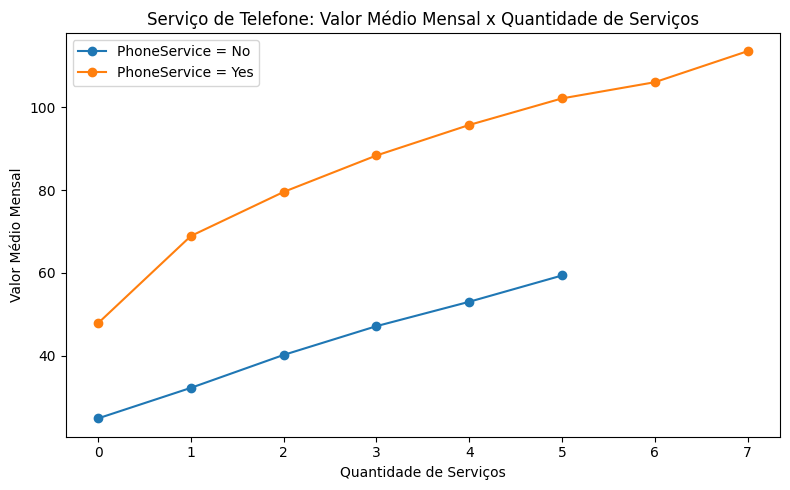

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(
    simplificado_No.index, # Access Qtd_Servicos from the index
    simplificado_No['Media_Mensal'],
    marker='o',
    label='PhoneService = No'
)

plt.plot(
    simplificado_Yes['Qtd_Servicos'],
    simplificado_Yes['Media_Mensal'],
    marker='o',
    label='PhoneService = Yes'
)

plt.title('Serviço de Telefone: Valor Médio Mensal x Quantidade de Serviços')
plt.xlabel('Quantidade de Serviços')
plt.ylabel('Valor Médio Mensal')
plt.legend()
plt.tight_layout()
plt.show()

E clientes que tem fibra otica qual a media de pagamento em relação a contratação de outros serviços

Analise: clientes que tem fibra otica ou não e contrata outros serviços

In [230]:
service_fibra_Yes = clientes_cancelados[clientes_cancelados['InternetService'] == 'Fiber optic'].copy()

In [231]:
service_fibra_Yes['Qtd_Servicos'] = (service_fibra_Yes[servicos] == 'Yes').sum(axis=1)
simplifica_fibra_Yes = (service_fibra_Yes.groupby('Qtd_Servicos')['Charges.Monthly'].agg(Qtd_Clientes='count',Media_Mensal='mean' ).reset_index())
simplifica_fibra_Yes

,Qtd_Servicos,Qtd_Clientes,Media_Mensal
0,0,138,70.041667
1,1,255,76.637451
2,2,267,84.243820
3,3,241,91.794606
4,4,205,98.455610
5,5,139,104.433453
6,6,42,110.001190
7,7,10,115.645000


In [232]:
service_fibra_No = clientes_cancelados[clientes_cancelados['InternetService'] != 'Fiber optic'].copy()
service_fibra_No['Qtd_Servicos'] = (service_fibra_No[servicos] == 'Yes').sum(axis=1)
simplifica_fibra_No = (service_fibra_No.groupby('Qtd_Servicos')['Charges.Monthly'].agg(Qtd_Clientes='count',Media_Mensal='mean' ).reset_index())
simplifica_fibra_No

,Qtd_Servicos,Qtd_Clientes,Media_Mensal
0,0,208,29.236058
1,1,144,42.952431
2,2,94,49.842021
3,3,65,56.518462
4,4,35,63.802857
5,5,18,72.452778
6,6,7,82.285714
7,7,1,92.450000


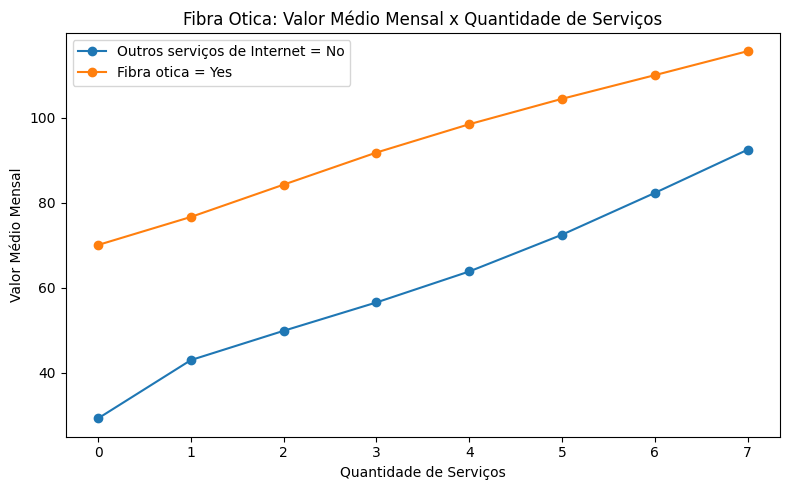

In [233]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(
    simplifica_fibra_No['Qtd_Servicos'],
    simplifica_fibra_No['Media_Mensal'],
    marker='o',
    label='Outros serviços de Internet = No'
)

plt.plot(
    simplifica_fibra_Yes['Qtd_Servicos'],
    simplifica_fibra_Yes['Media_Mensal'],
    marker='o',
    label='Fibra otica = Yes'
)

plt.title('Fibra Otica: Valor Médio Mensal x Quantidade de Serviços')
plt.xlabel('Quantidade de Serviços')
plt.ylabel('Valor Médio Mensal')
plt.legend()
plt.tight_layout()
plt.show()

Quem tem serviço de telefone o valor pago é menor ou maior comparando com clientes que pagam fibra otica?

E se comparar a tipo de contrato?

In [234]:
media_pgto_servicotel_int_contrato = clientes_cancelados.groupby(['InternetService','PhoneService','Contract'])['Charges.Monthly'].mean().reset_index()
media_pgto_servicotel_int_contrato.style.format({'Charges.Monthly': '{:.2f}'}).background_gradient(cmap='Blues')


,InternetService,PhoneService,Contract,Charges.Monthly
0,DSL,No,Month-to-month,36.46
1,DSL,No,One year,46.54
2,DSL,No,Two year,50.47
3,DSL,Yes,Month-to-month,53.07
4,DSL,Yes,One year,69.35
5,DSL,Yes,Two year,72.70
6,Fiber optic,Yes,Month-to-month,86.47
7,Fiber optic,Yes,One year,101.65
8,Fiber optic,Yes,Two year,104.71
9,No,Yes,Month-to-month,20.18


In [235]:
media_pgto_metodo_contrato = clientes_cancelados.groupby(['PaymentMethod','Contract'])['Charges.Monthly'].mean().reset_index()
media_pgto_metodo_contrato.style.format({'Charges.Monthly': '{:.2f}'}).background_gradient(cmap='Blues')

,PaymentMethod,Contract,Charges.Monthly
0,Bank transfer (automatic),Month-to-month,75.38
1,Bank transfer (automatic),One year,82.29
2,Bank transfer (automatic),Two year,95.41
3,Credit card (automatic),Month-to-month,74.92
4,Credit card (automatic),One year,86.45
5,Credit card (automatic),Two year,82.06
6,Electronic check,Month-to-month,77.78
7,Electronic check,One year,91.04
8,Electronic check,Two year,88.18
9,Mailed check,Month-to-month,53.35


#Analisando faturamento

In [238]:
clientes_cancelados.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,FaixaEtaria
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,ate 5 meses
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,até 24 meses


In [239]:
valor_total_faturamento = dados_normalizados['Charges.Total'].sum()
valor_total_faturamento

np.float64(16548281.85)

In [240]:
valor_total_cancelado = clientes_cancelados['Charges.Total'].sum()
valor_total_cancelado

np.float64(2862926.9000000004)

In [241]:
porcentagem = (valor_total_cancelado / valor_total_faturamento) * 100
porcentagem = f'{porcentagem:.2f}%'
porcentagem

'17.30%'

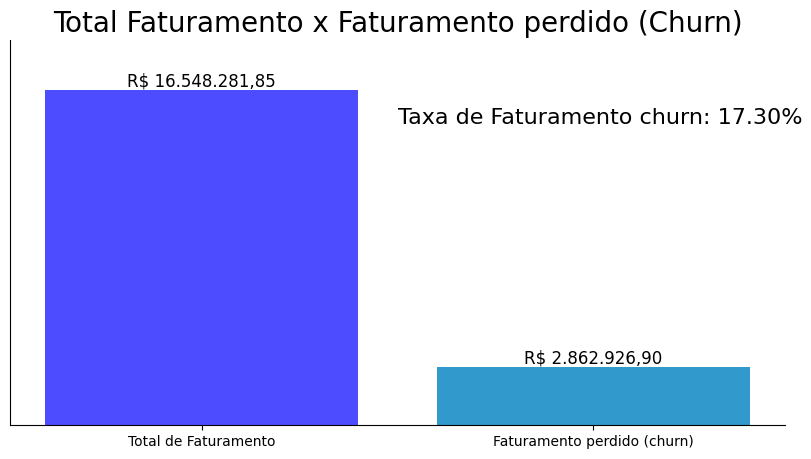

In [242]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def formato_real(x, pos):
    return f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

categorias = ['Total de Faturamento', 'Faturamento perdido (churn)']
valores = [valor_total_faturamento, valor_total_cancelado]

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(categorias,valores,color=cores)
ax.yaxis.set_major_formatter(FuncFormatter(formato_real))

ax.set_title('Total Faturamento x Faturamento perdido (Churn)', fontsize=20)
ax.set_xlabel('Clientes', fontsize=14)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(y=0.15)

#Rótulos nas barras
for i, v in enumerate(valores):
    ax.text(i,v,formato_real(v,0),ha='center',va='bottom',color='black',fontsize=12)

plt.text(0.5,max(valores)*0.9,f'Taxa de Faturamento churn: {porcentagem}',ha='left',fontsize=16)
plt.savefig("imagens/totalFaturamento_X_FaturamentoPerdido.png", dpi=300, bbox_inches="tight")

plt.show()

Colunas Contas Diarias

In [317]:
dados_normalizados.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [318]:
dados_normalizados['ContasDiarias'] = dados_normalizados['Charges.Monthly'] / 30

In [319]:
dados_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ContasDiarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [320]:
valor_diario = dados_normalizados.groupby('Churn')['ContasDiarias'].mean()
valor_diario




,ContasDiarias
Churn,
No,2.042171
Não informado,2.113743
Yes,2.481378


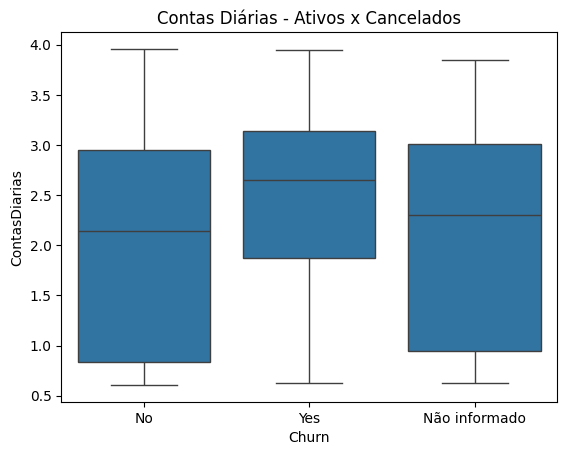

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='ContasDiarias', data=dados_normalizados)
plt.title('Contas Diárias - Ativos x Cancelados')
plt.show()

In [322]:
dados_normalizados['ContasDiarias'].describe()

,ContasDiarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


#Correlação

In [323]:
previsao = dados_normalizados.copy()

In [324]:
previsao.drop(columns=['customerID'], inplace=True,errors='ignore')
previsao.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ContasDiarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [325]:
previsao.value_counts('Churn')

,count
Churn,
No,5174
Yes,1869
Não informado,224


In [326]:
previsao['Churn'] = previsao['Churn'].replace({'Yes': 1,'No': 0,'Não informado': None})

/tmp/ipython-input-2833622444.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  previsao['Churn'] = previsao['Churn'].replace({'Yes': 1,'No': 0,'Não informado': None})


In [327]:
#previsao['Churn'] = pd.to_numeric(previsao['Churn'])

In [328]:
previsao.value_counts('Churn')

,count
Churn,
0.0,5174
1.0,1869


In [329]:
previsao['Churn'].dtype

dtype('float64')

In [342]:
previsao[['Churn', 'ContasDiarias']].dtypes

,0
Churn,float64
ContasDiarias,float64


Natureza da relação

Correlação positiva

Indica que, à medida que o valor das contas diárias aumenta, o churn tende a aumentar

Ou seja: clientes que pagam mais por dia apresentam ligeiramente mais cancelamentos.

In [331]:
previsao[['Churn', 'ContasDiarias']].corr()

,Churn,ContasDiarias
Churn,1.000000,0.193356
ContasDiarias,0.193356,1.000000


In [332]:
servicos = [
    'PhoneService',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'MultipleLines'
]

previsao[servicos] = previsao[servicos].replace({
    'Yes': 1,
    'No': 0,
    'No internet service': -2,
    'No phone service': -1
})

/tmp/ipython-input-574520898.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  previsao[servicos] = previsao[servicos].replace({


In [333]:
previsao[servicos] = previsao[servicos].apply(pd.to_numeric,errors='coerce')

In [334]:
previsao[servicos].dtypes

,0
PhoneService,int64
InternetService,float64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64
TechSupport,int64
StreamingTV,int64
StreamingMovies,int64
MultipleLines,int64


In [335]:
previsao['Qtd_Servicos'] = previsao[servicos].sum(axis=1)

In [336]:
previsao[['Qtd_Servicos']].head()
previsao['Qtd_Servicos'].describe()

,Qtd_Servicos
count,7267.000000
mean,0.650750
std,6.296548
min,-11.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,8.000000


Natureza da relação

Correlação positiva

À medida que a quantidade de serviços contratados aumenta, o churn tende a aumentar levemente

Isso pode parecer contraintuitivo, mas é comum em bases reais.

In [337]:
previsao[['Churn', 'Qtd_Servicos']].corr()

,Churn,Qtd_Servicos
Churn,1.000000,0.157648
Qtd_Servicos,0.157648,1.000000


In [338]:
corr_servicos = previsao[['Churn'] + servicos].corr()

corr_servicos['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
StreamingTV,0.195564
StreamingMovies,0.194503
DeviceProtection,0.142570
OnlineBackup,0.135508
TechSupport,0.106031
OnlineSecurity,0.103716
MultipleLines,0.036310
PhoneService,0.011942
InternetService,NaN


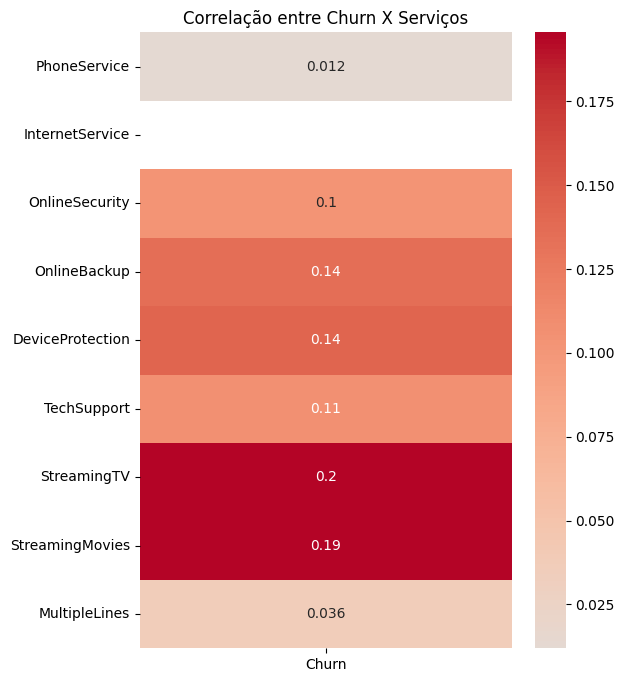

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,8))
sns.heatmap(
    corr_servicos[['Churn']].drop('Churn'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Correlação entre Churn X Serviços')
plt.savefig("imagens/correlacao_servicos.png", dpi=300, bbox_inches="tight")
plt.show()

#RELATORIO FINAL

##**1 - Introdução**

O desafio desse projeto foi analisar o fenomeno de **evasão de clientes (Churn)** da Empresa TelecomX, identificando os principais fatores associados ao cancelamento de serviços. o Churn é um dos maiores desafios para as empresas de telecomunicações, pois impacta diretamente na receita, aumenta custos de aquisição de novos clientes e reduz a previsibilidade do negócio.

A partir de uma base de dados contendo informações demográficas, tipo de serviços contratado e status de evasão, busquei responder às seguintes perguntas:

- Quais características estão mais associadas ao churn?
- Quais serviços ou tipos de contrato apresentam maior risco de evasão?
- Como os dados podem apoiar decisões estrategicas para retenção de clientes?



##**2 - Limpeza e Tratamento de Dados**

Nesta etapa foram feitos os seguintes procedimentos:

**2.1 - Importação da base:**

Os dados utilizados nesta análise foram obtidos a partir de um repostório no Github, no formato JSON. A importação foi realizada utilizando a biblioteca **pandas**, permitindo o carregamento direto da base de dados a partir da URL.

Em seguida, salvei os dados em um dataframe dados e foi realizada uma inspeção inicial para compreensão da estrutura dos dados, tipos de variáveis e registros.

**2.2 - Tratamento da estrutura do dataset:**

Quanto importei o arquivo colunas customer, phone, internet e acoount vieram em formato de dicionários (objetos JSON aninhados) que foram normalizados e salvo novamente em um novo dataframe dados normalizados.

**2.3 - Tratamento de valores ausentes e inconsistências:**

- Usei o metodo info() para obter um resumo rapido e estruturado do dataframe, onde foi verificado que a coluna Charges.total estava com o tipo de dados em object sendo que correto seria float pois se trata de uma coluna de valores. A coluna foi ajustada para float.
- Usei metodo isnull() para detectar valores Nam
- Usei o método unique() para identificar os valores únicos e o método nunique() para contar a quantidade de valores distintos (únicos).
- Realizei uma verificação de valores vazios representados por strings vazias ('') e foi constatado que no dataframe constava 224 valores vazios na coluna churn. A coluna foi ajustada para Não informado.


**2.3.1 Tratamento dos valores ausentes - analise da variável Churn:**

O base de dados é composta por 7267 registros de clientes. Ao analisar a variável Churn, que indica a evasão dos clientes, foi constatado 224 valores ausentes, o que corresponte a 3,8% do total.

A existência desses valores vazios pode impactar análises estatísticas e modelos preditivos caso não seja devidamente tratado.

A identificação prévia de valores ausentes na variável alvo é especialmente relevante, pois o Churn é o principal indicador analisado neste estudo.

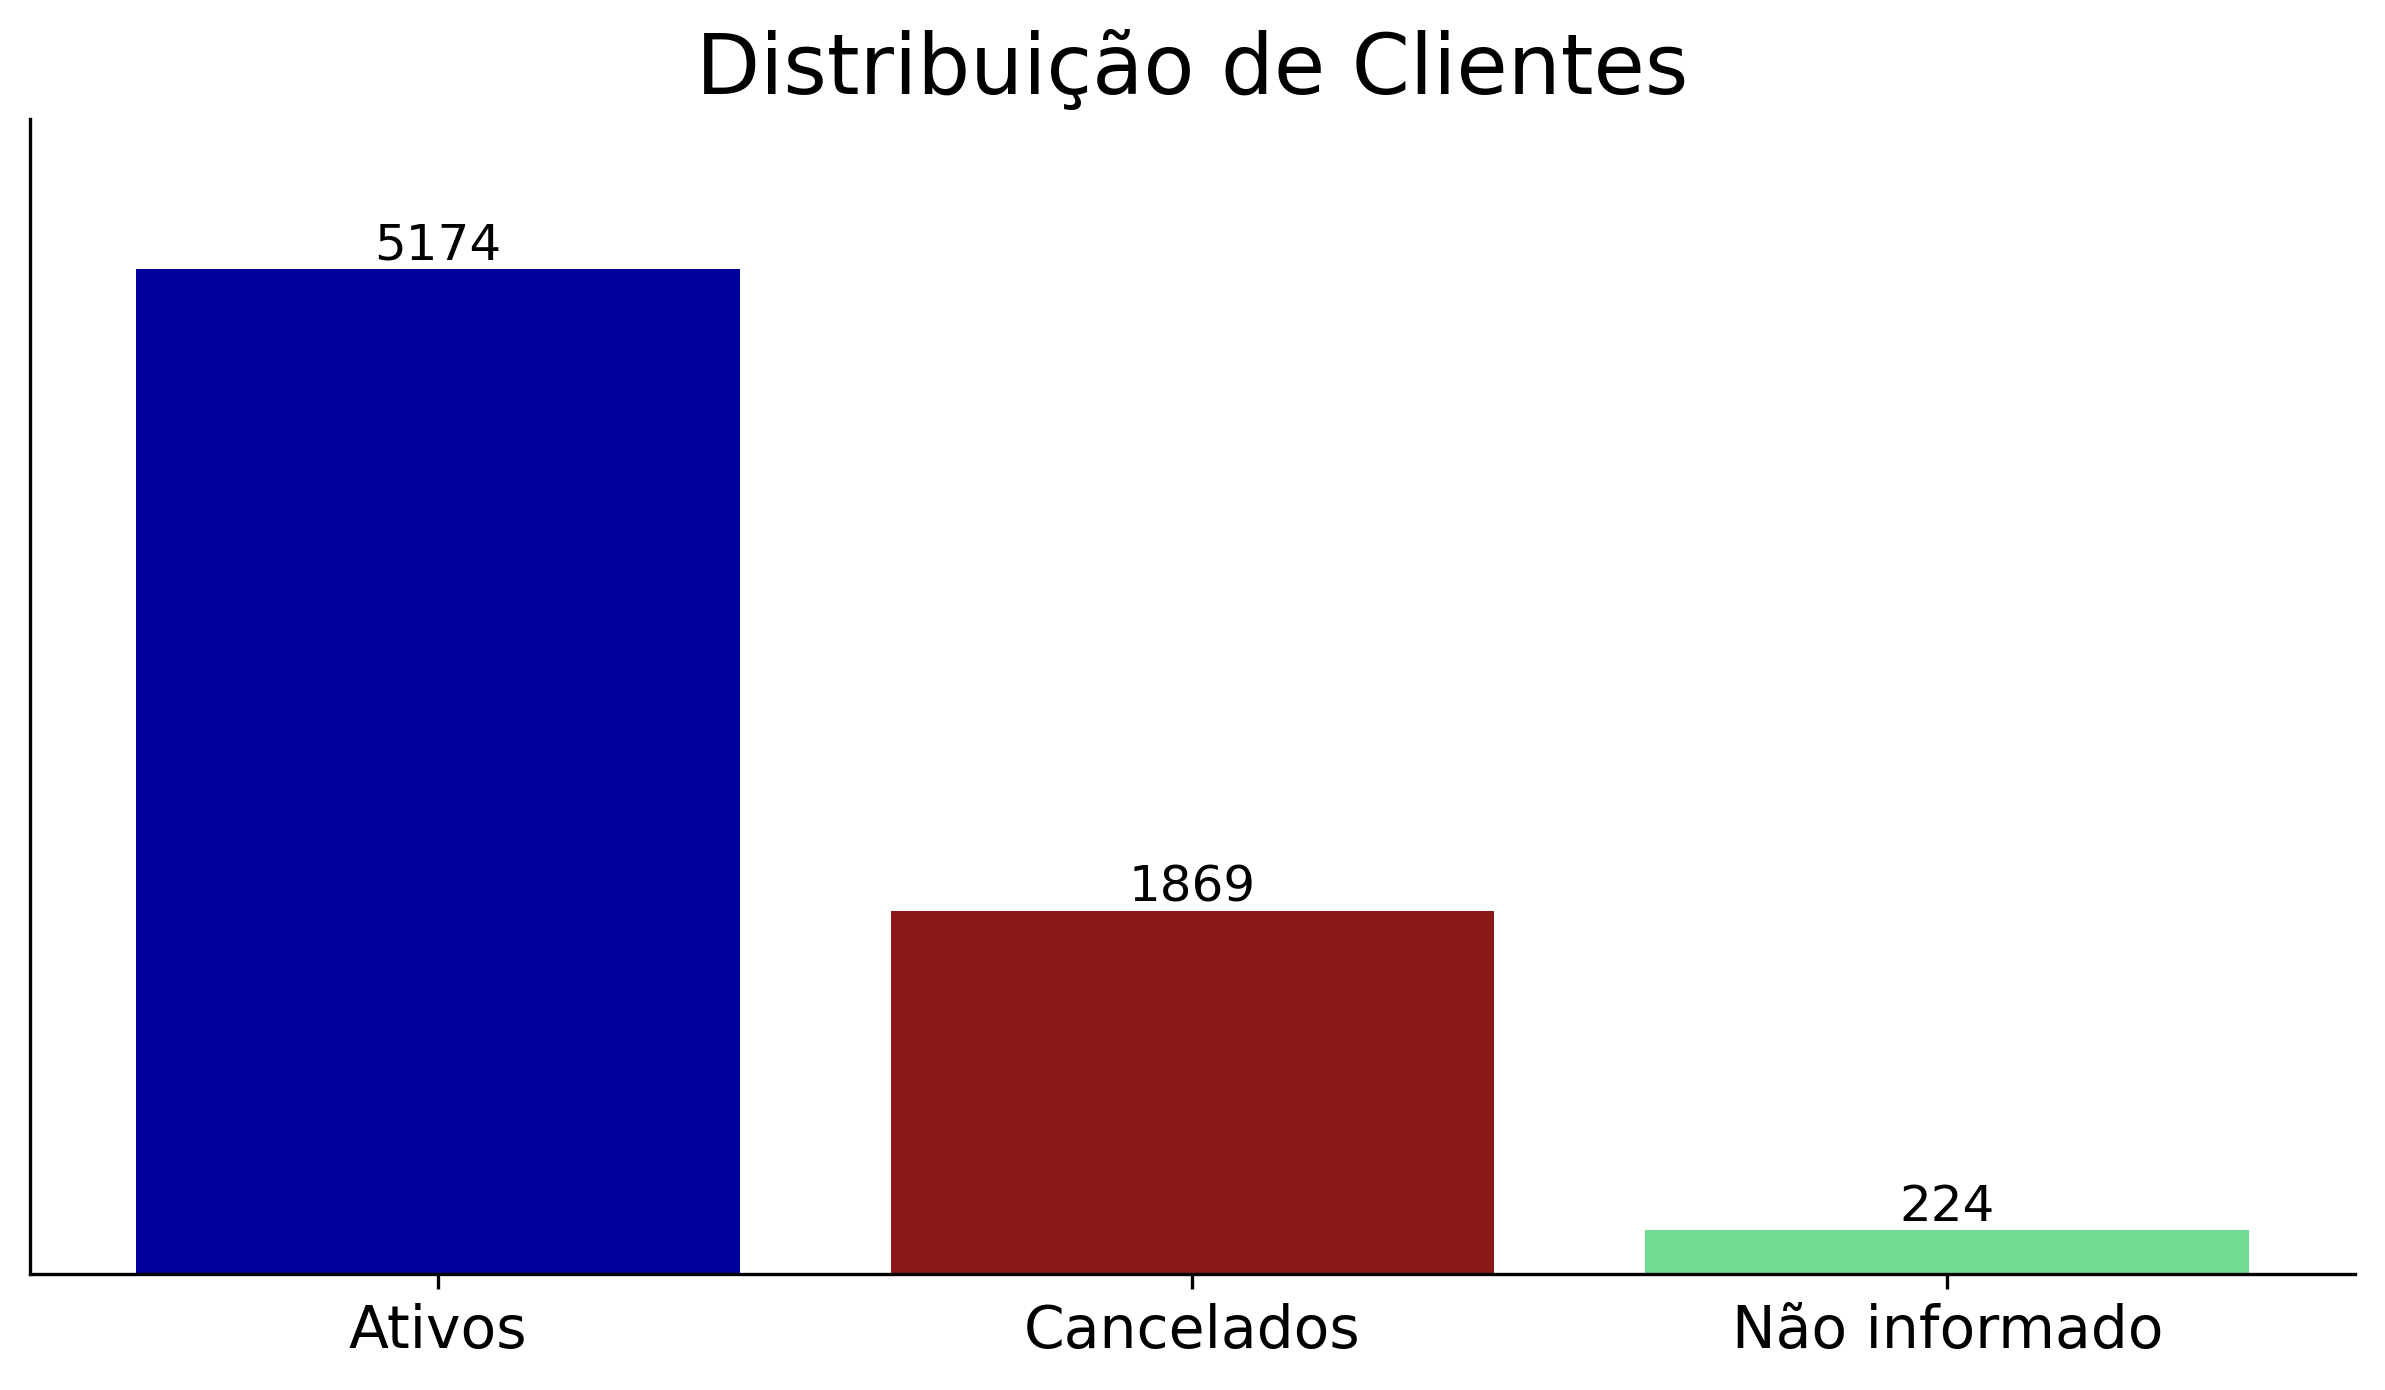

In [ ]:
from IPython.display import Image, display

display(Image(filename="imagens/distribuicao_clientes.png",width=500))


##**3 - Análise Exploratória de Dados (EDA)**

A Análise Exploratória teve como foco identificar padrões, tendências e possíveis relações entre as variáveis e o Churn.

A partir desse momento vou separar a base de dados em clientes cancelados que constam 1869 registros e Clientes Ativos constam 5174 registros sem considerar os clientes com churn não informado que constam 224 registros(vazios).

Seguir analisando o dataframe Clientes Cancelados

**3.1 - Analise geral do Churn:**

- Avaliação da proporção de clientes que cancelaram versus os que permaneceram.
A base tem um total de 7043 clientes, lembrando que não estou considerando Churn Não informado, desses clientes 1869 clientes cancelaram o contrato, o que equivale a 26,54%.

Considera-se um percentual relevante de evasão, indicando oportunidade clara de melhoria em retenção.




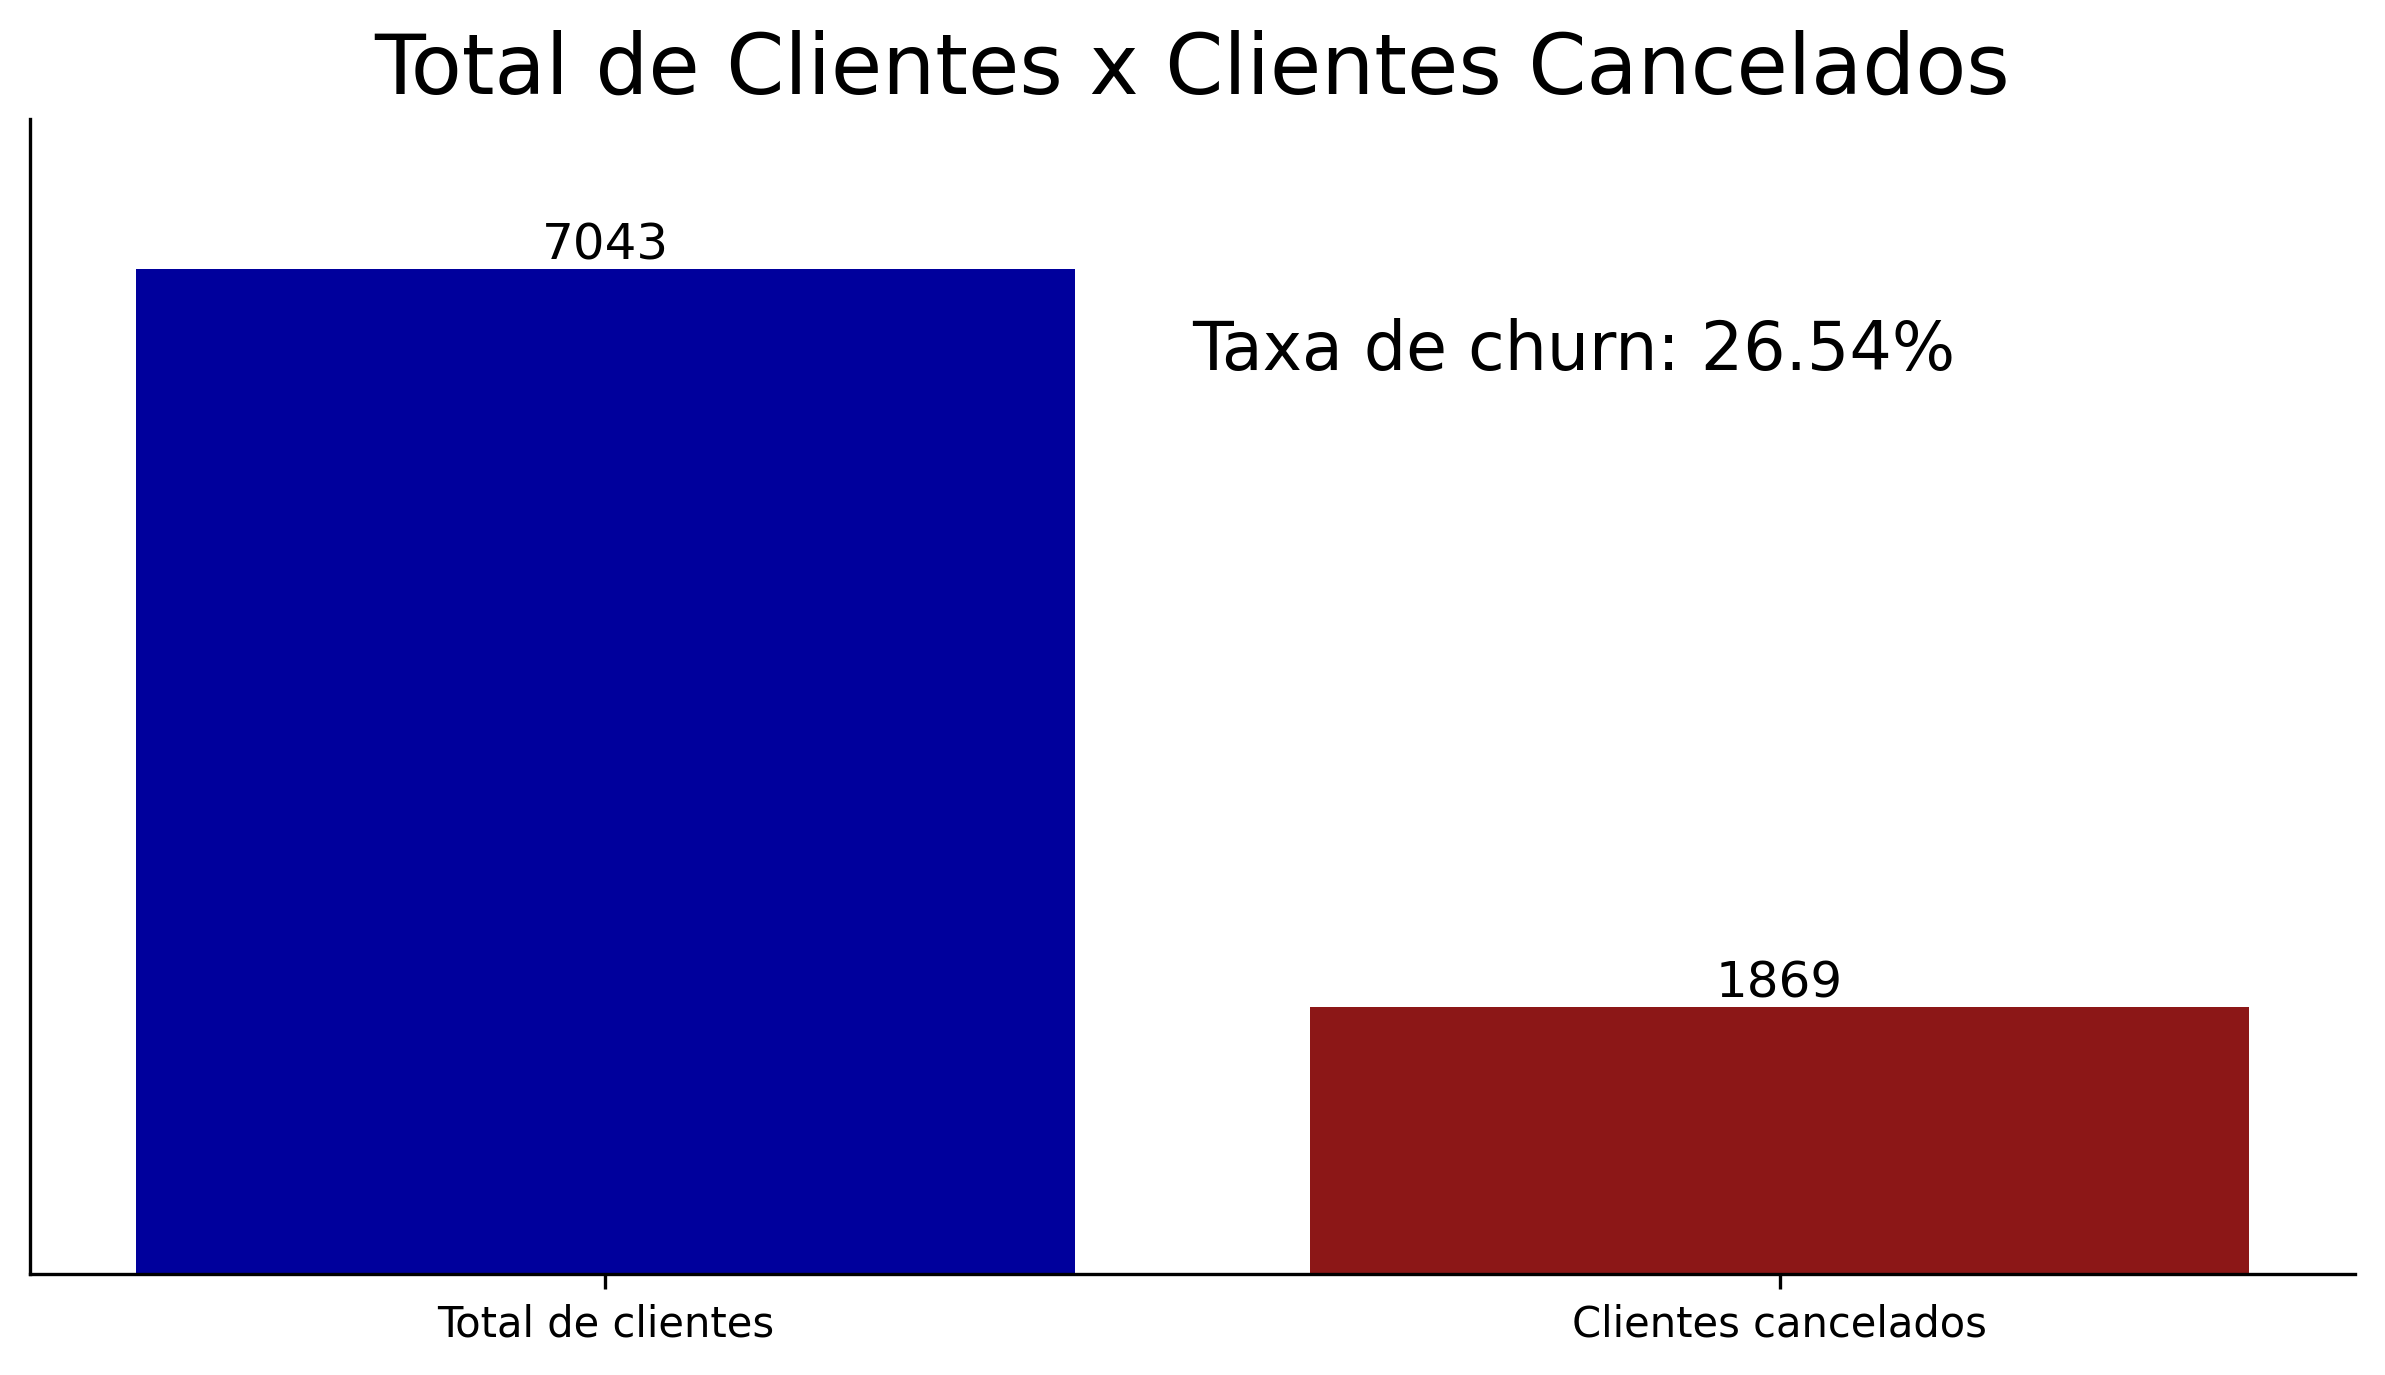

In [ ]:
display(Image(filename="imagens/clientes_X_cancelados.png",width=500))

**3.2 - Analisando variaveis**

Foram analisadas variaveis SeniorCitizen, partner e dependents que constaram que clientes que não tem parceiros e dependentes que mais cancelam.

| Seniorcitizen | Quantidade |  
|---------------|------------|
| 0             | 1393       |
| 1             | 476        |


| Partner | Quantidade |
|------------|------------|
| No         | 1200       |
| Yes        | 669        |


| Dependents | Quantidade |
|------------|------------|
| No         | 1543       |
| Yes        | 326        |


Foram analisadas as variáveis PhoneService,InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines que são serviços oferecidos pela empresa. Clientes que tem serviços de internet fibra otica, que não tem os serviços oferecidos de segurança on line, backup on line, proteção de dispositivo e suporte tecnico são que mais cancelam os contratos.  



| Possui               | PhoneService | InternetService | OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport | StreamingTV | StreamingMovies | MultipleLines |
|----------------------|--------------|-----------------|----------------|--------------|------------------|-------------|-------------|------------------|---------------|
| Yes                  | 1699         | 0               | 295            | 523          | 545              | 310         | 814         | 818              | 850           |
| No                   | 170          | 113             | 1461           | 1233         | 1211             | 1446        | 942         | 938              | 849           |
| Fiber optic          | 0            | 1297            | 0              | 0            | 0                | 0           | 0           | 0                | 0             |
| DSL                  | 0            | 459             | 0              | 0            | 0                | 0           | 0           | 0                | 0             |
| No internet service  | 0            | 0               | 113            | 113          | 113              | 113         | 113         | 113              | 0             |
| No phone service     | 0            | 0               | 0              | 0            | 0                | 0           | 0           | 0                | 170           |


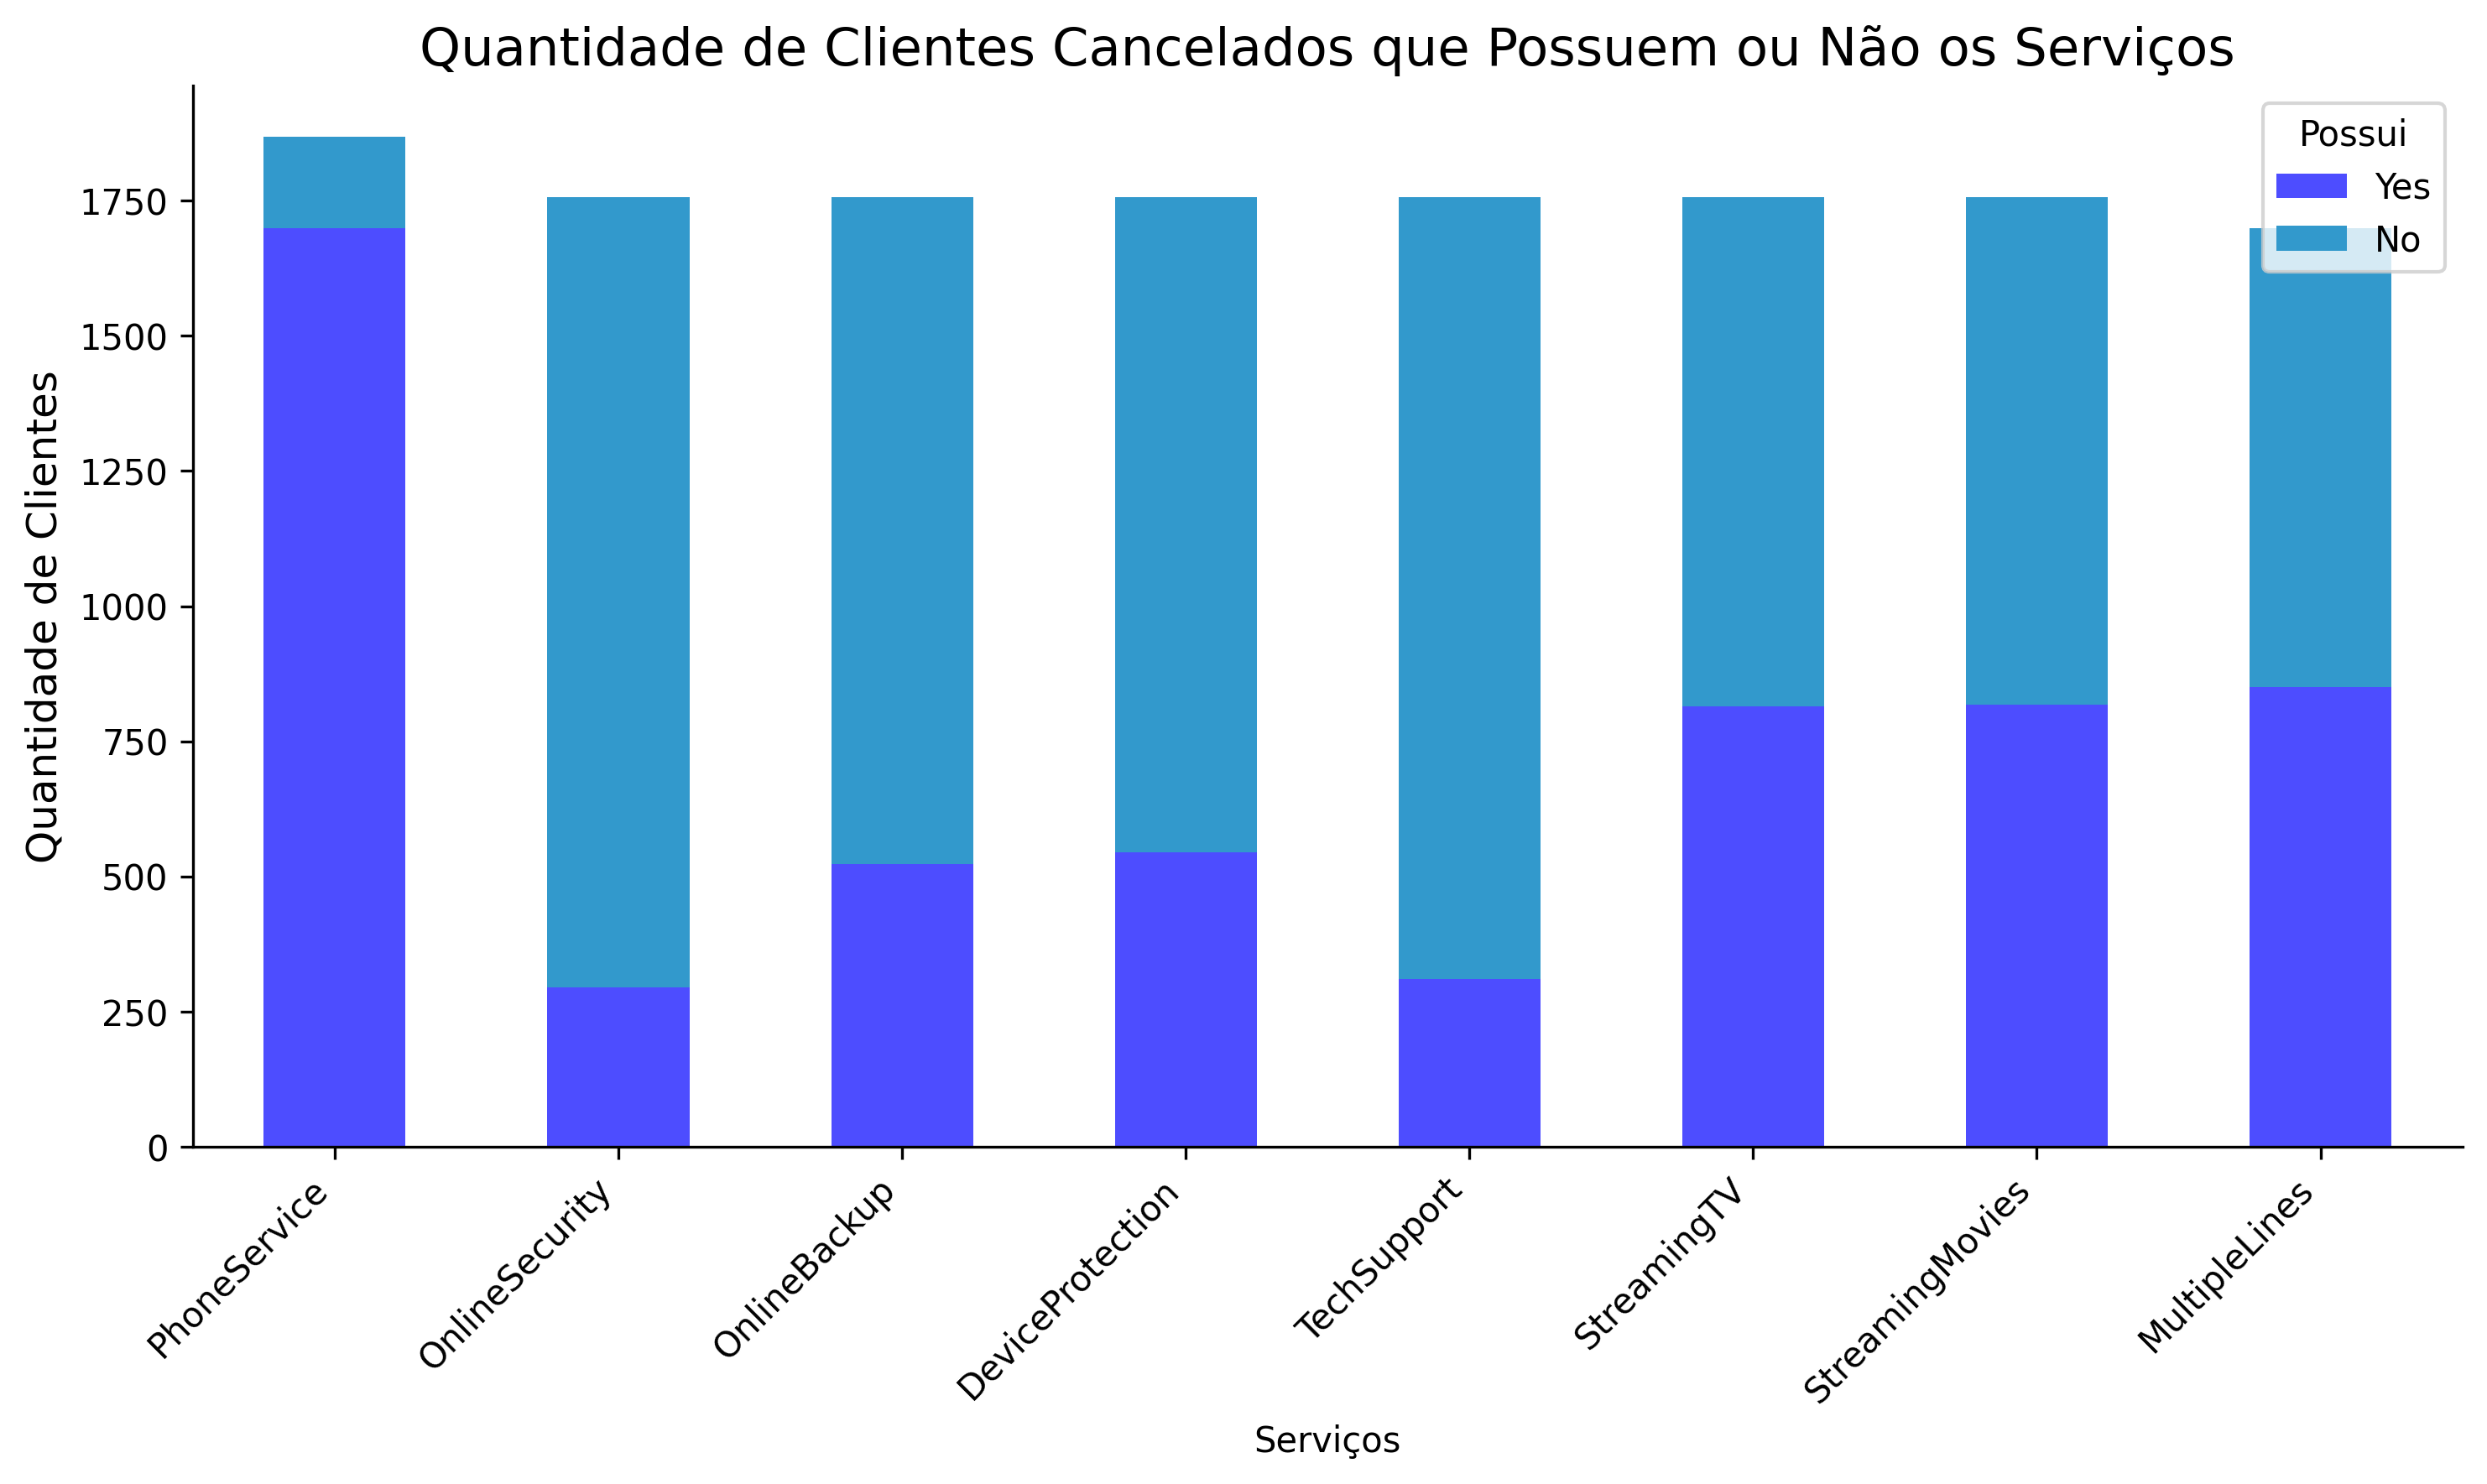

In [ ]:
display(Image(filename="imagens/possuem_serviços.png",width=500))

Foi criada a variavel faixa etária:

| FaixaEtaria        | Quantidade |
|--------------------|------------|
| até 5 meses        | 744        |
| até 12 meses       | 293        |
| até 24 meses       | 294        |
| até 48 meses       | 325        |
| mais de 48 meses   | 213        |

 Observa-se que a maior concentração de clientes está na faixa de até 5 meses, indicando um volume significativo de clientes recentes.

Essa análise é fundamental para identificar padrões de churn e apoiar a definição de estratégias voltadas à fidelização dos clientes, especialmente nos primeiros meses de contrato.


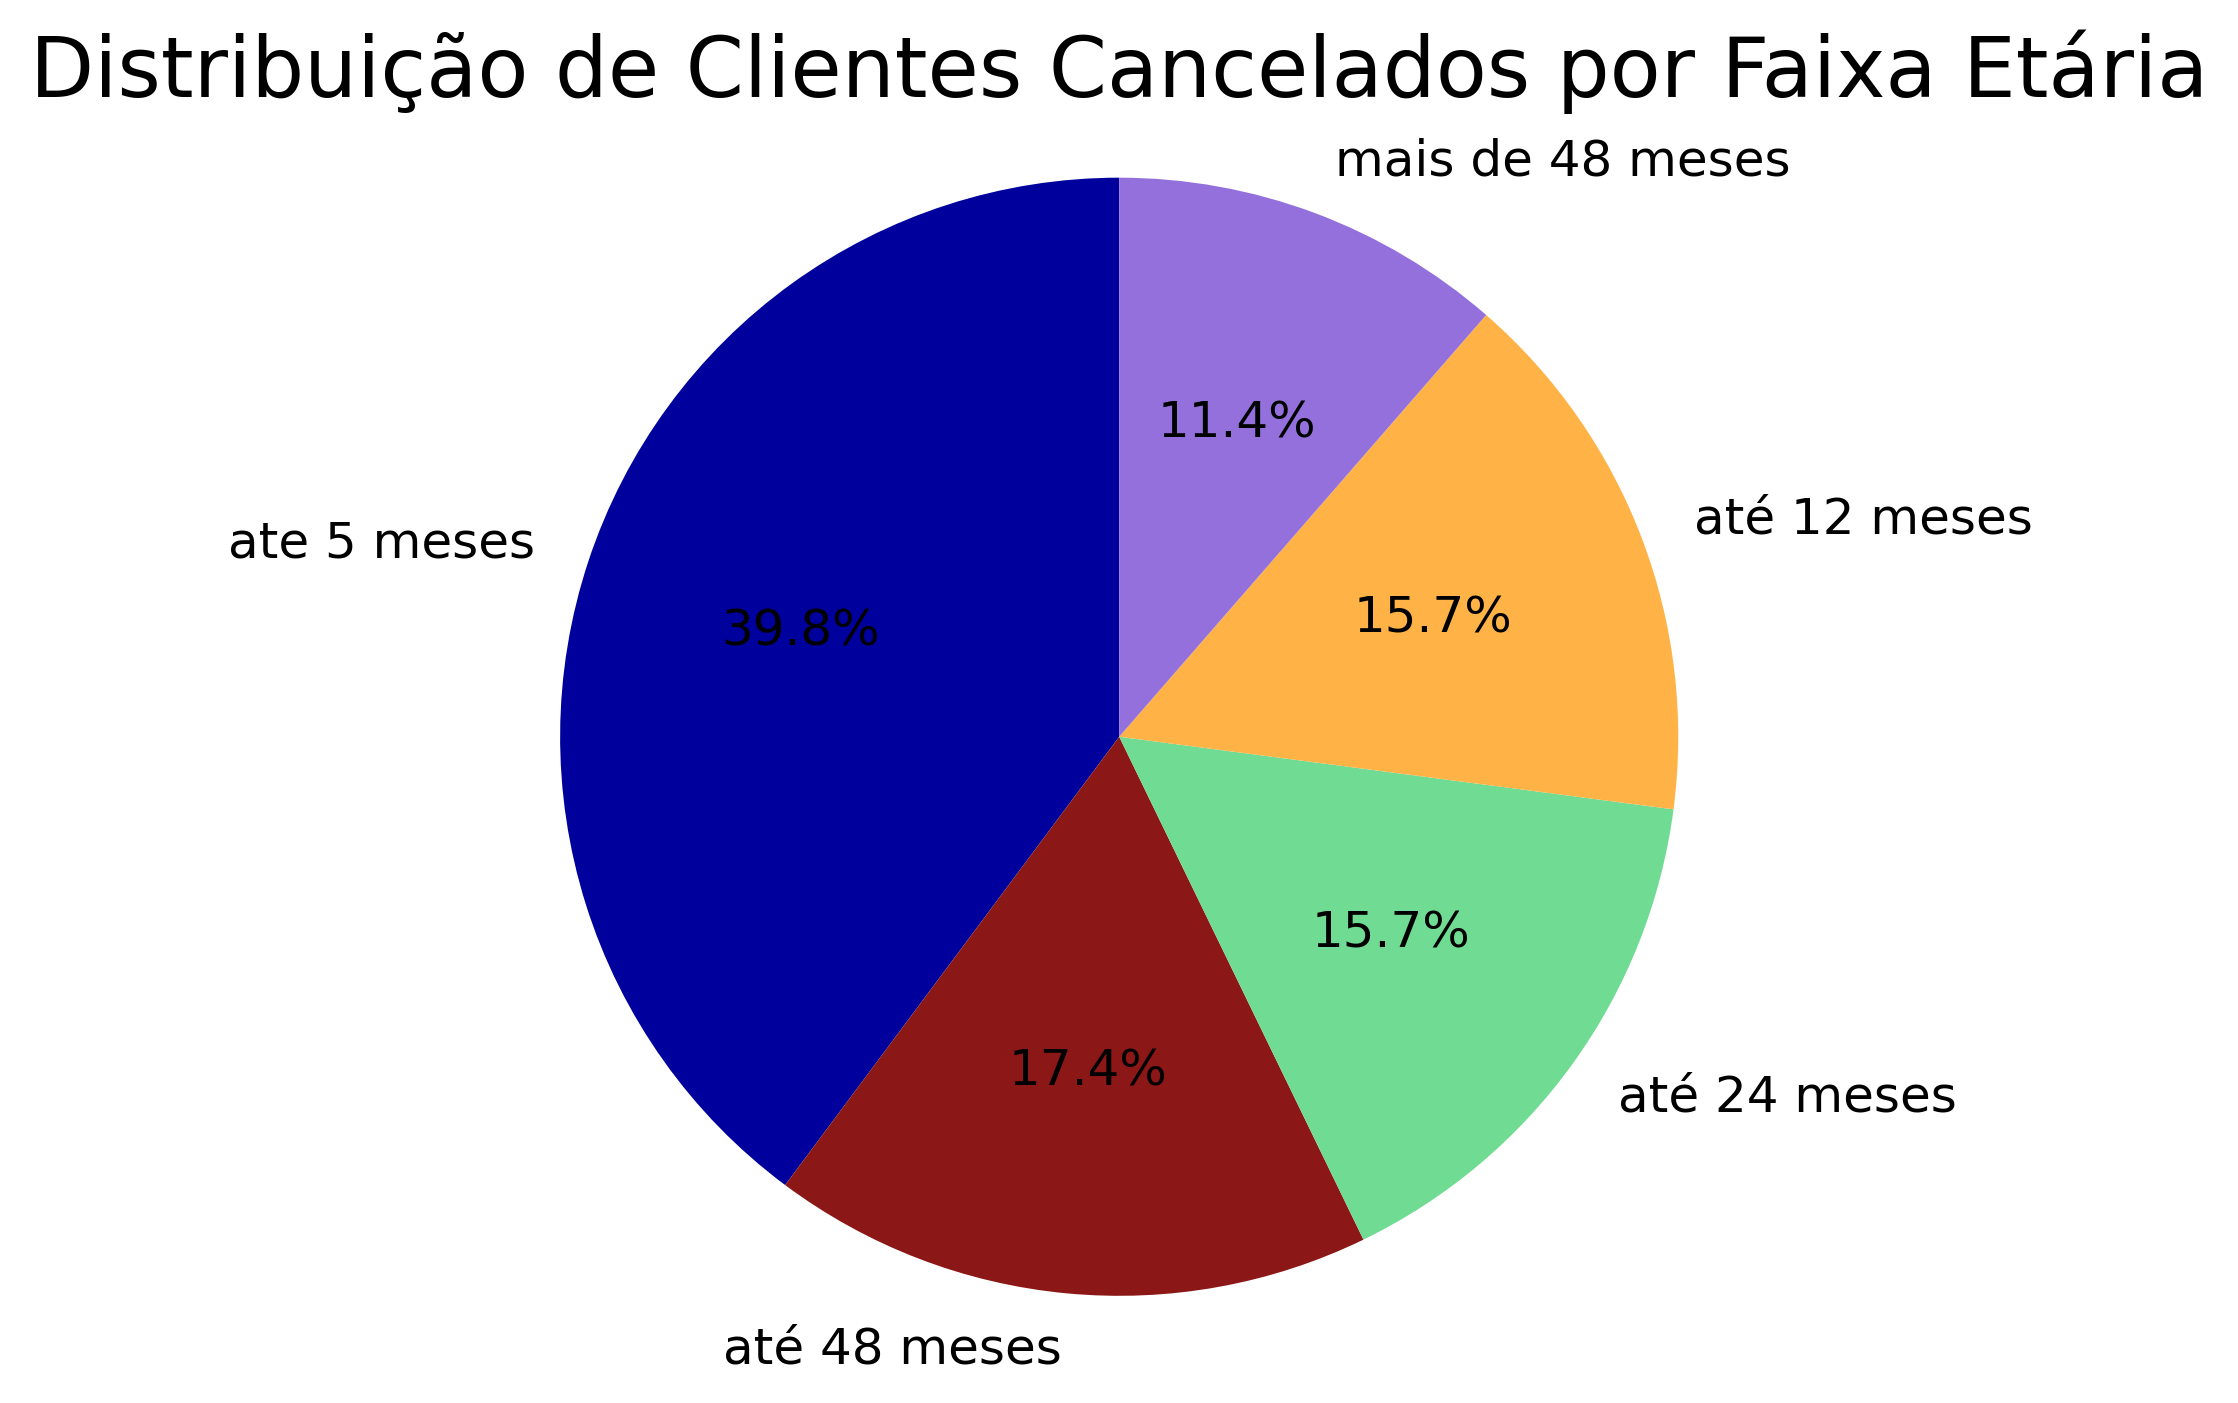

In [ ]:
display(Image(filename="imagens/faixa_etaria.png",width=500))

Foram analisadas as variaveis PaymentMethod e Contract:
Clientes que pagam por cheque eletrônico e o tipo de contrato por mês tendem a cancelar mais.

| PaymentMethod                   | Quantidade |
|--------------------------------|------------|
| Electronic check                | 1071       |
| Mailed check                    | 308        |
| Bank transfer (automatic)       | 258        |
| Credit card (automatic)         | 232        |



| Contract        | Quantidade |
|-----------------|------------|
| Month-to-month  | 1655       |
| One year        | 166        |
| Two year        | 48         |


*Cruzamento entre serviços de telefone x serviço de internet*

Foi feito o cruzamento entre serviço de telefone X serviço de internet e constatou que:

- Todos os clientes cancelados que tem fibra otica tem serviço de telefone embora não precise de telefone para ter fibra otica.

- Os clientes com fibra otica e serviço de telefone pagam em media mais caro do que os clientes que tem serviço de telefone e DSL

- Dos 1699 clientes que tem serviço de telefone 1297 tem também fibra otica

| PhoneService | DSL | Fiber optic | No |
|--------------|-----|-------------|----|
| No           | 170 | 0           | 0  |
| Yes          | 289 | 1297        | 113|


| PhoneService | InternetService | Charges.Monthly (Média) |
|--------------|-----------------|--------------------------|
| No           | DSL             | 37.53                    |
| Yes          | DSL             | 55.88                    |
| Yes          | Fiber optic     | 88.13                    |
| Yes          | No              | 20.37                    |


*Análise da Cobrança Mensal em Função da Quantidade de Serviços por clientes que tem serviço de telefone*

A tabela apresenta a relação entre a quantidade de serviços contratados pelos clientes que tem serviço de telefone, o número de clientes em cada categoria e a média de cobrança mensal. Observa-se uma tendência clara de aumento da cobrança mensal média conforme cresce o número de serviços contratados.

Apesar disso, nota-se que as faixas com maior número de serviços possuem uma quantidade reduzida de clientes, indicando que poucos clientes optam por pacotes mais completos.

| Qtd_Servicos | Qtd_Clientes | Media_Mensal |
|--------------|--------------|--------------|
| 0            | 311          | 47.84        |
| 1            | 351          | 68.89        |
| 2            | 322          | 79.54        |
| 3            | 276          | 88.34        |
| 4            | 227          | 95.72        |
| 5            | 152          | 102.13       |
| 6            | 49           | 106.04       |
| 7            | 11           | 113.54       |


*Analisando o faturamento:*

O faturamento total foi de R\$16.548.281,85, enquanto o faturamento perdido por churn foi de R\$ 2.862.926,90.

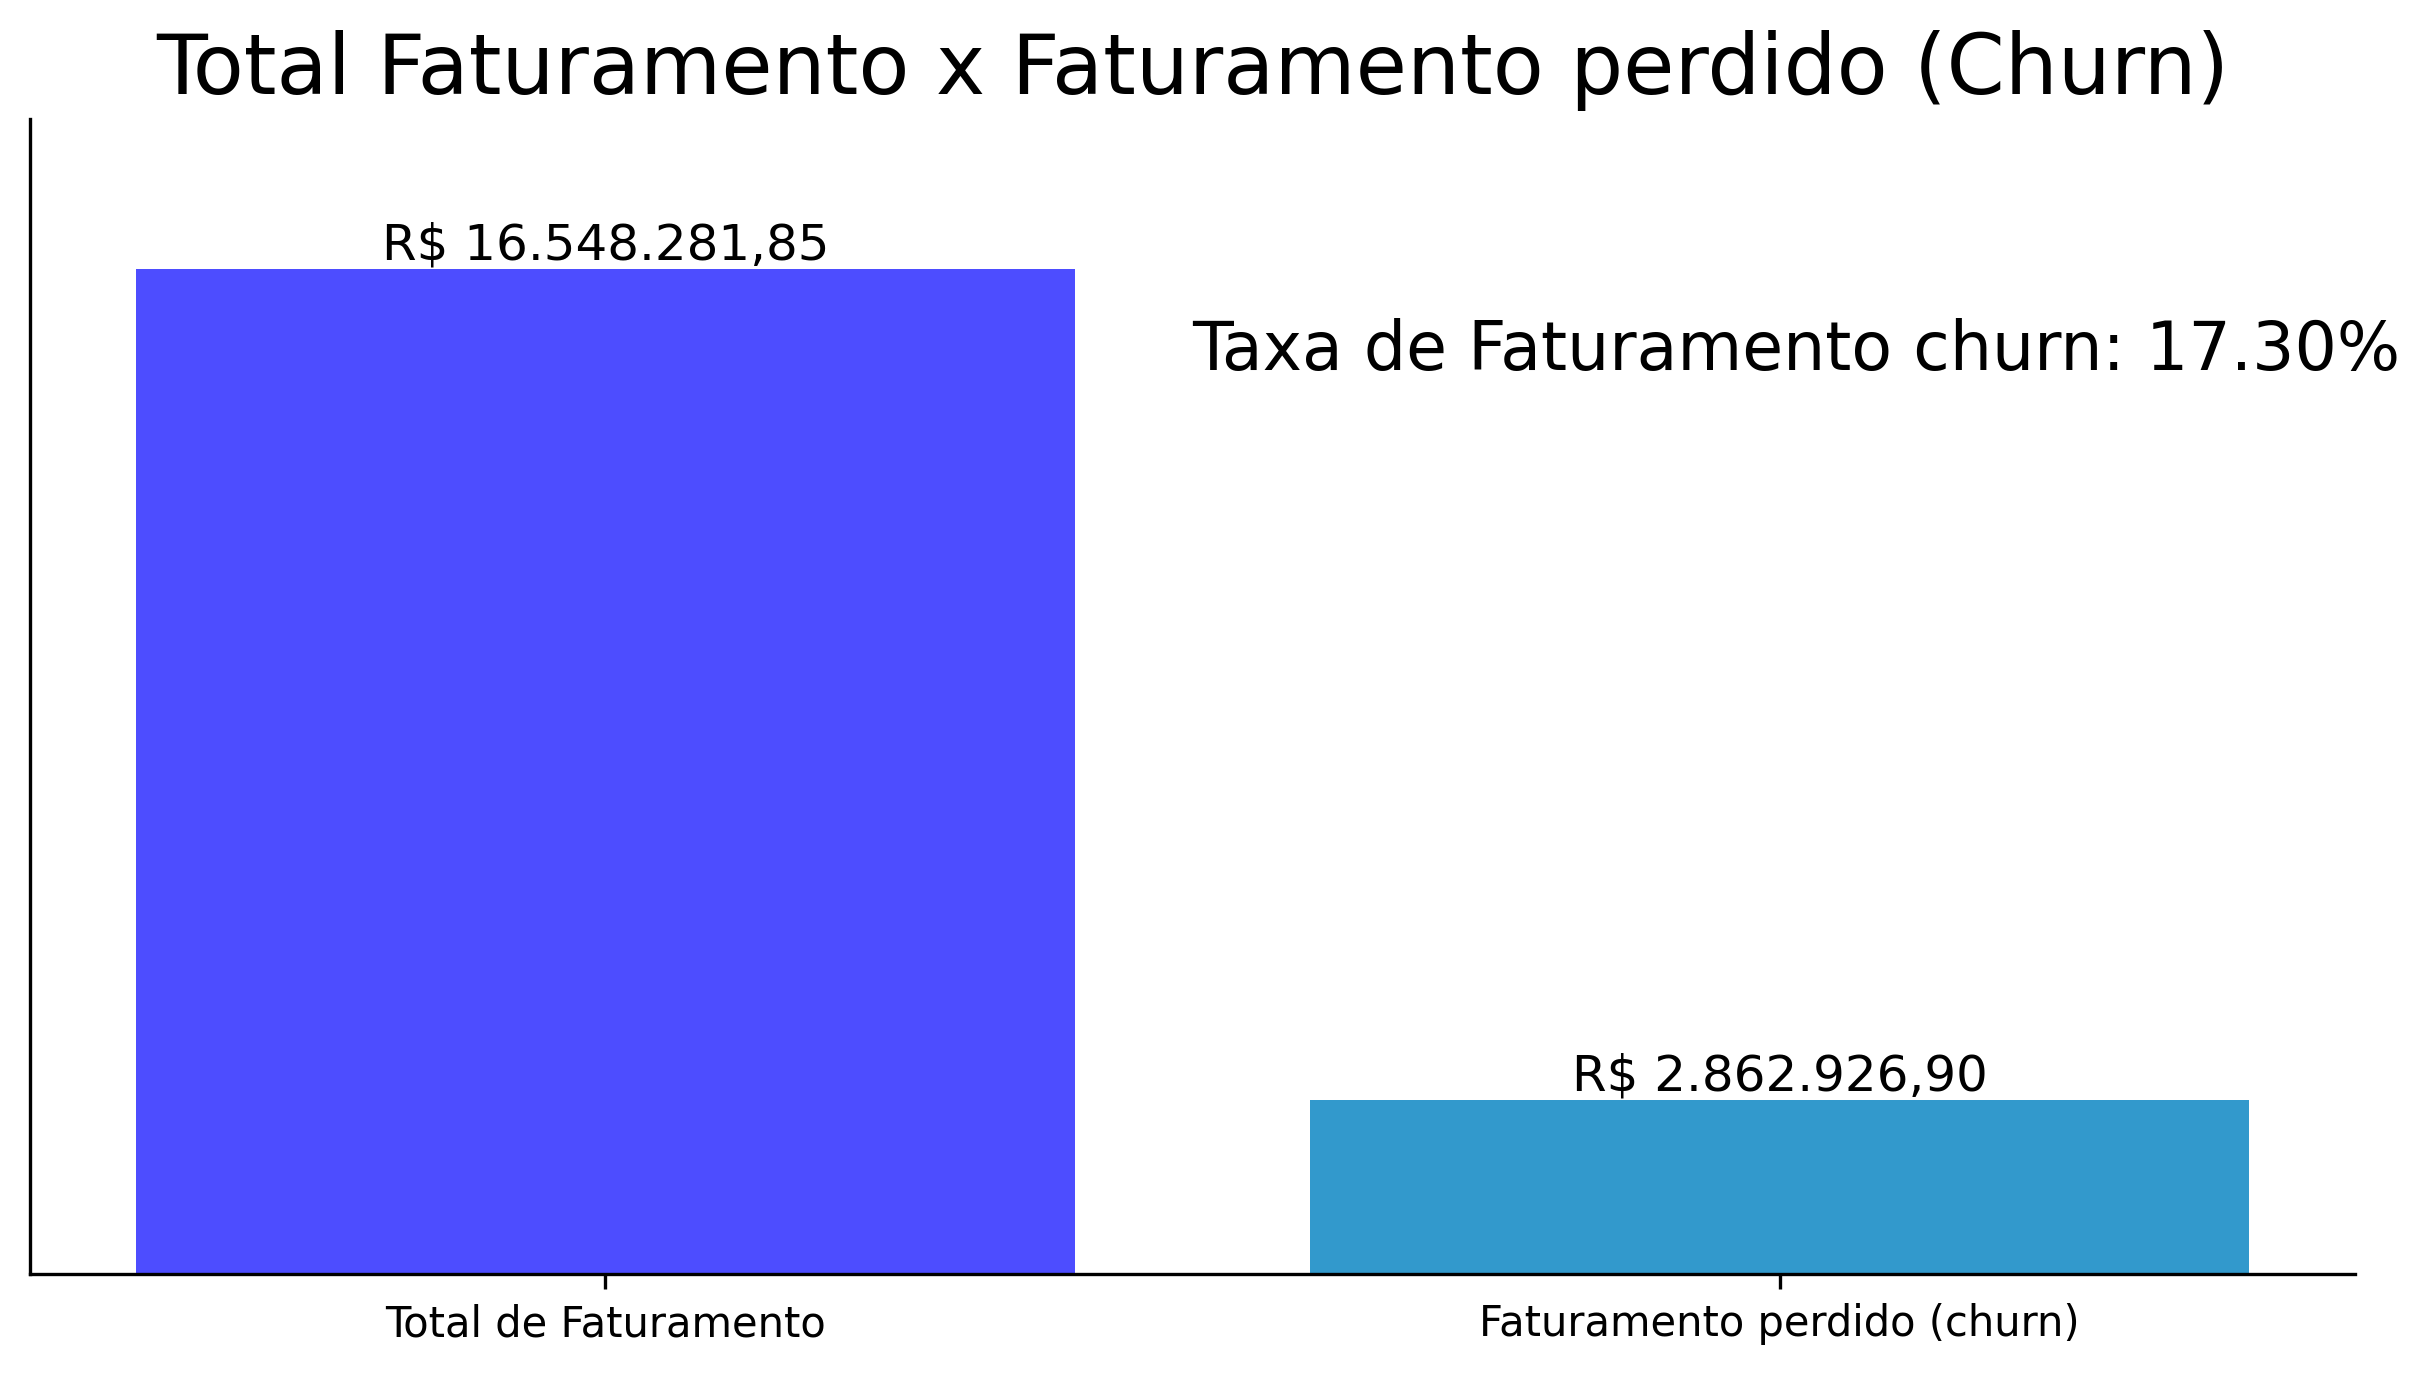

In [141]:
display(Image(filename="imagens/totalFaturamento_X_FaturamentoPerdido.png",width=500))

*Analisando a correlação:*

Correlação positiva

Indica que, à medida que o valor das contas diárias aumenta, o churn tende a aumentar

Ou seja: clientes que pagam mais por dia apresentam ligeiramente mais cancelamentos.

| Variável        | Churn | ContasDiarias |
|-----------------|-------|---------------|
| Churn           | 1.000 | 0.193         |
| ContasDiarias   | 0.193 | 1.000         |

Clientes que possuem streaming tendem a cancelar um pouco mais

Possível interpretação:

Streaming aumenta o valor da fatura

Problemas de qualidade (velocidade, estabilidade)

Serviços “acessórios” são os primeiros a gerar insatisfação

Esses serviços são bons candidatos a ações de retenção.

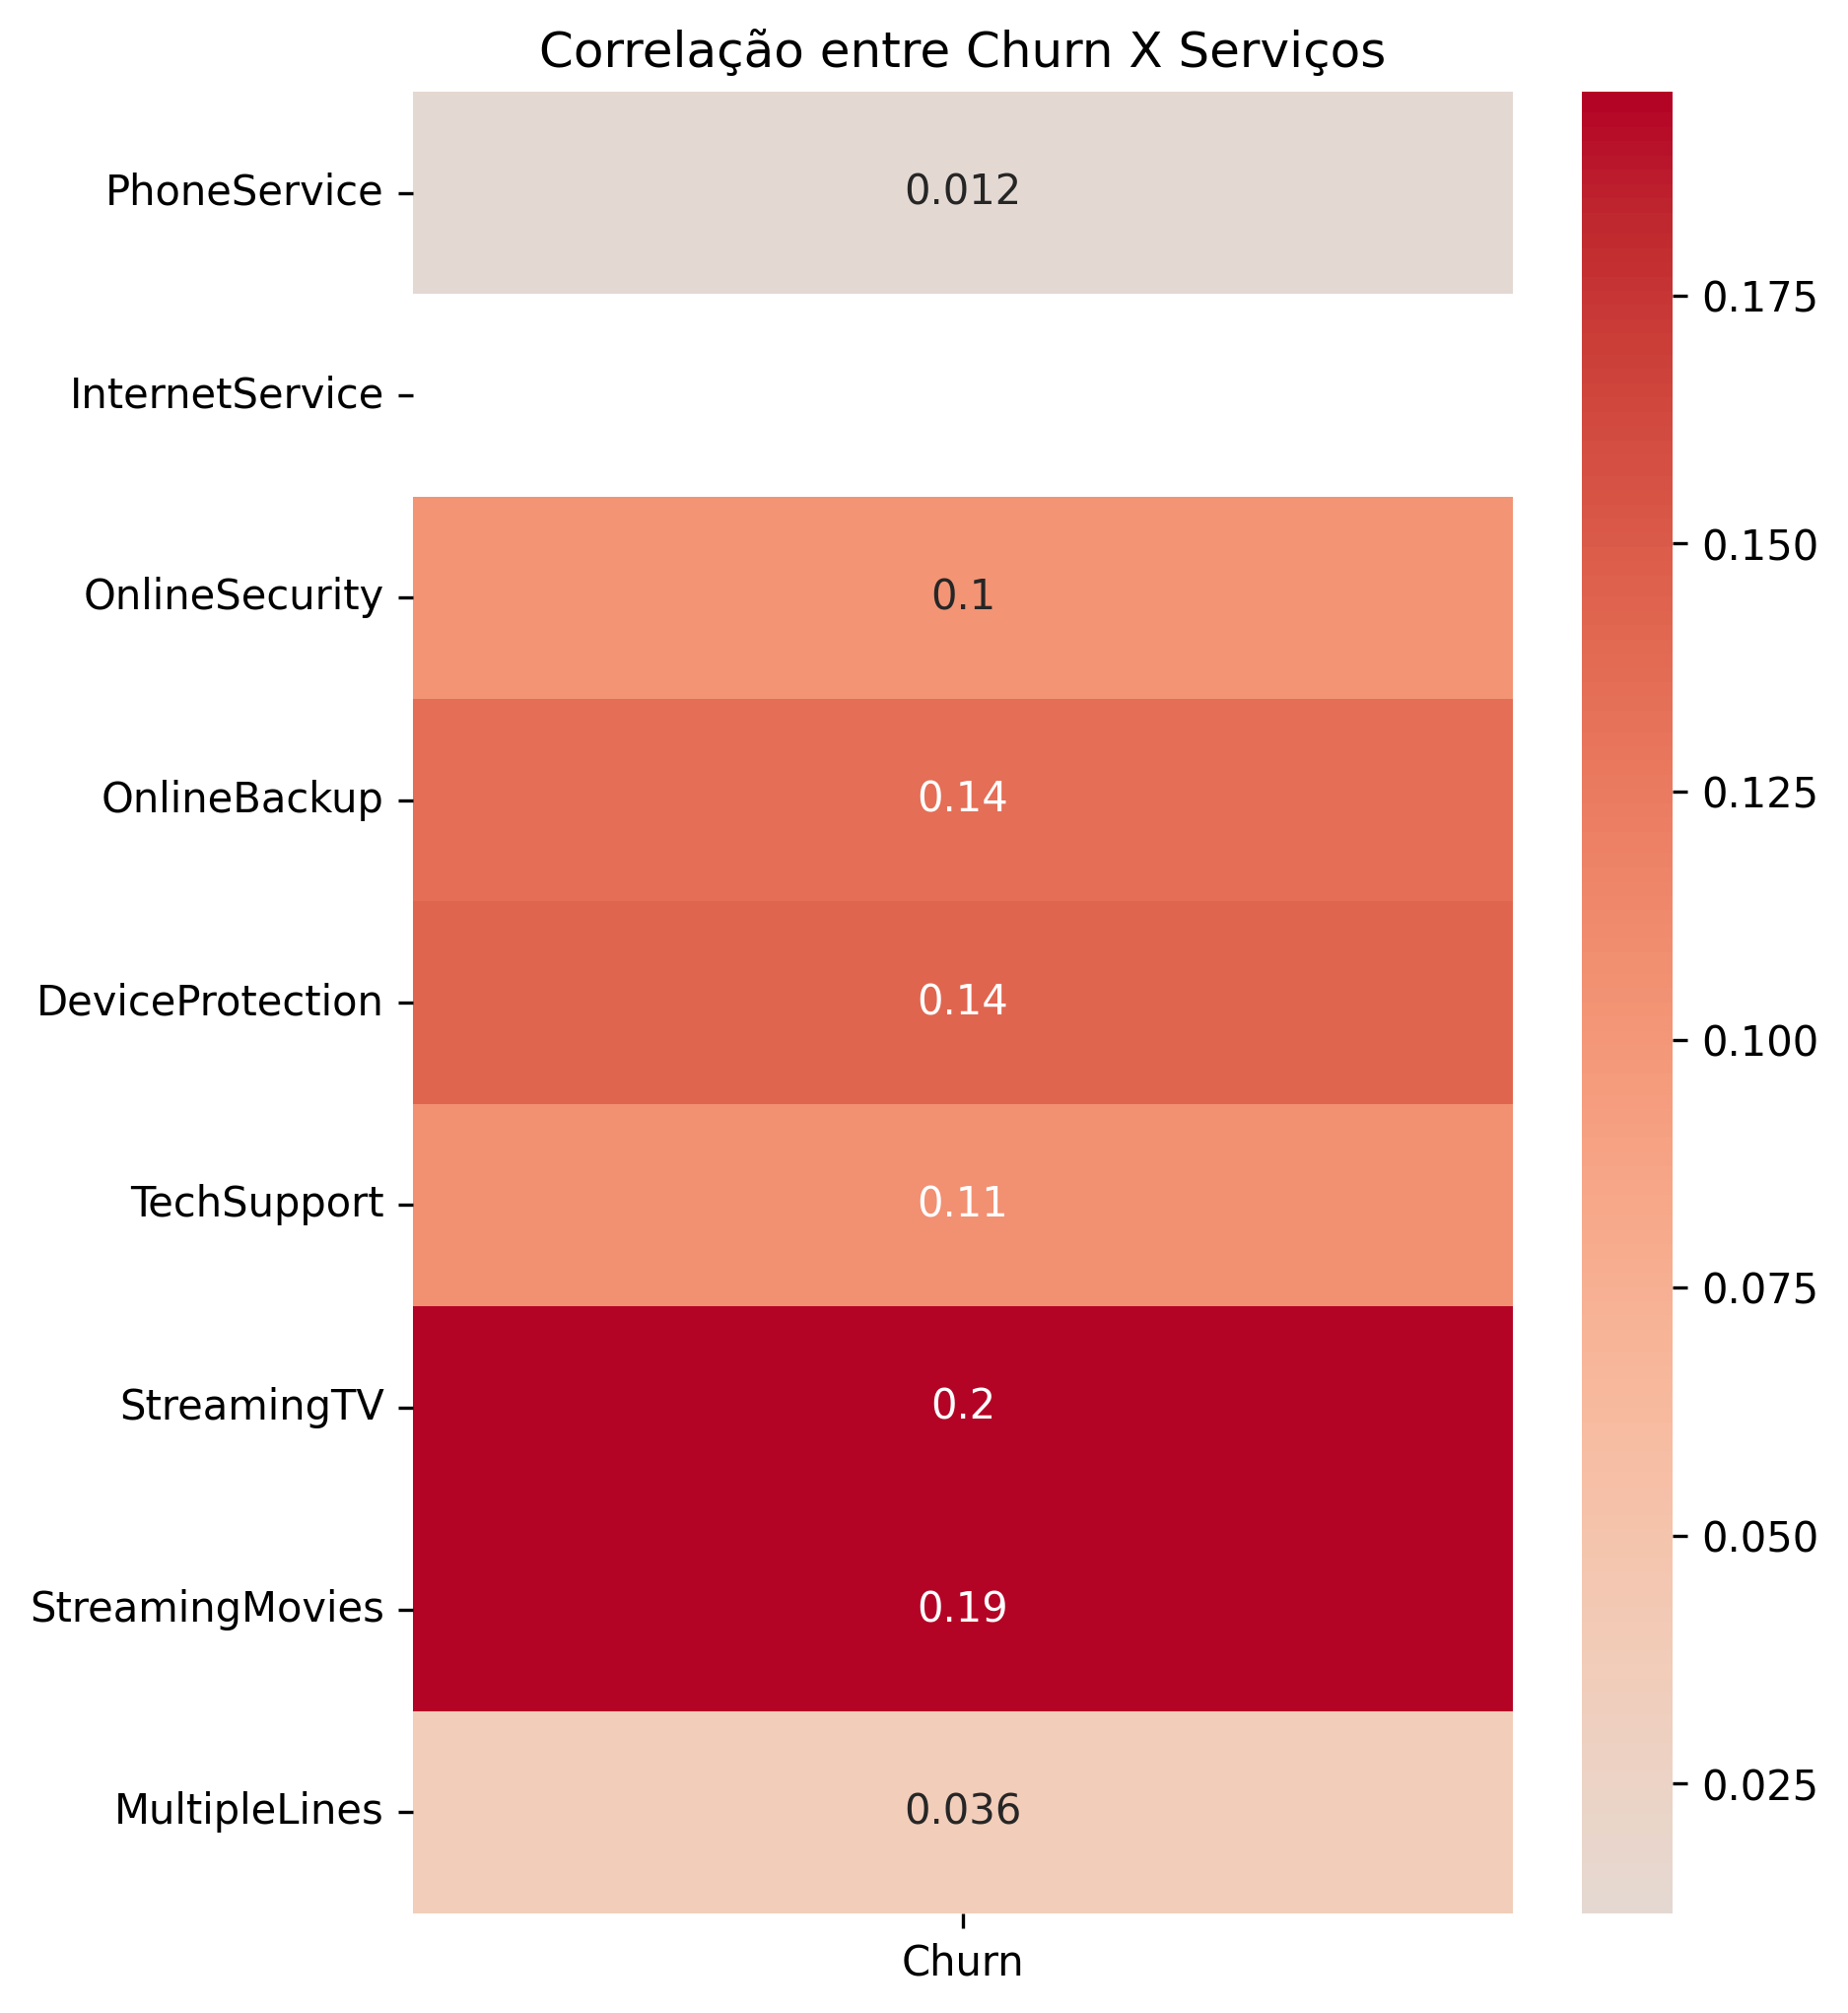

In [341]:
display(Image(filename="imagens/correlacao_servicos.png",width=400))

##**4. Conclusões e Insights**

Com base nas análises realizadas, destacam-se os seguintes insights:

- Cliente novo(1-5 meses) de contrato, sem parceiro, sem dependentes,usando fibra otica, sem serviços adicionais, paga por Eletronic Check e tem contrato mensal são os que mais cancelam.

- Quanto mais serviços contratados maior é a média mensal paga.

- Poucos clientes optam por pacotes completos

- Clientes que possuem streaming tendem a cancelar um pouco mais

##**5. Recomendações:**

Com base nos resultados obtidos, recomenda-se:

- Incentivar clientes com poucos serviços a aderirem a pacotes mais completos.

- Incentivar upgrade para contratos anuais

- Promover serviços que demonstraram associação com maior retenção, como suporte técnico e segurança online.

- Criar campanhas específicas para estimular contratação de serviços adicionais.

- Monitoramento contínuo do Churn

- Criar pacotes de benefícios para os primeiros meses

- Contato proativo com clientes em risco (primeiros meses)

